In [ ]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

load_dotenv()

True

# Importando os dados

Dados previamente tratados.
Foram importados 48 índices

In [242]:
# Carregar variáveis de ambiente
load_dotenv()

path_dados_tratados = os.getenv('PATH_DADOS_TRATADOS')

dados_indicadores = pd.read_csv(path_dados_tratados + "dados_indicadores_tratados.csv")
dados_indices = pd.read_csv(path_dados_tratados + "dados_indices.csv", sep=';')
dados_indices.drop(columns=['Unnamed: 0'], inplace=True)
dados_indices.drop(columns=['incc'], inplace=True)
preco_acoes = pd.read_csv(path_dados_tratados + 'preco_acoes.csv')
preco_acoes = preco_acoes.iloc[:-1, :]

In [243]:
dados_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 47 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   data                                                                                                                        59 non-null     object 
 1   ibov                                                                                                                        59 non-null     float64
 2   iee                                                                                                                         59 non-null     float64
 3   selic                                                                                                                       59 

Renomear colunas

In [244]:
# ...existing code...
# De/para: coluna original (3ª col.) -> novo nome (2ª col.)
rename_map = {
    "IPAOG-DI Ipa - todos os itens - Nro. Índice(1477007)": "IPAOG-DI",
    "INCC-Brasil-DI-Todos os itens(1464783)": "INCC-Brasil-DI",
    "Indicador de Incerteza da Economia Brasil (IIE-Br)(1428452)": "IIE-Br",
    "Indicador de Incerteza da Economia Brasil - Componente Mídia (Mídia - IIE-Br)(1463188)": "Mídia - IIE-Br",
    "Indicador de Incerteza da Economia Brasil - Componente Expactativas (Expec IIE-Br)(1463189)": "Expec IIE-Br",
    "Indicador Antecedente de Emprego (IA Emp) com ajuste sazonal(1416205)": "IA Emp",
    "Indicador Antecedente de Emprego (IA Emp) com ajuste sazonal(1416205) (Variação Percentual em Relação ao Período Anterior)": "Var. IA Emp",
    "PIB a preços de 1995(1428699)": "PIB 1995",
    "PIB a preços correntes(1428698)": "PIB Corrente",
    "Índice de volume mensal  - PIB a preços de mercado (1428676)": "Vol. PIB Mensal",
    "Índice de volume mensal pela ótica da produção - Valor adicionado a preços básicos(1428677)": "Vol. VA Produção",
    "Índice de volume mensal pela ótica da produção - Valor adicionado a preços básicos - Agropecuária(1428678)": "Vol. VA Agro",
    "Índice de volume mensal pela ótica da produção - Valor adicionado a preços básicos - Indústria(1428679)": "Vol. VA Indústria",
    "Índice de volume mensal pela ótica da produção - Valor adicionado a preços básicos - Serviços(1428680)": "Vol. VA Serviços",
    "Índice de volume mensal pela ótica da produção - Impostos (1428681)": "Vol. Impostos",
    "Índice de volume mensal com ajuste sazonal - PIB a preços de mercado (1428682)": "Vol. PIB Sazonal",
    "Índice de volume mensal pela ótica da produção com ajuste sazonal -Valor adicionado (1428683)": "Vol. VA Sazonal",
    "Índice de volume mensal pela ótica da produção com ajuste sazonal - Valor adicionado - Agropecuária(1428684)": "Vol. VA Agro Sazonal",
    "Índice de volume mensal pela ótica da produção com ajuste sazonal - Valor adicionado - Indústria(1428685)": "Vol. VA Ind. Sazonal",
    "Índice de volume mensal pela ótica da produção com ajuste sazonal - Valor adicionado - Serviços(1428686)": "Vol. VA Serv. Sazonal",
    "Índice de volume trimestral com ajuste sazonal - PIB(1428700)": "Vol. PIB Trim. Saz.",
    "Índice de volume trimestral com ajuste sazonal - Valor Adicionado(1428701)": "Vol. VA Trim. Saz.",
    "Índice de volume trimestral com ajuste sazonal - Valor Adicionado - Agropecuária(1428702)": "Vol. VA Agro Trim. Saz.",
    "Índice de volume trimestral com ajuste sazonal - Valor Adicionado - Indústria(1428703)": "Vol. VA Ind. Trim. Saz.",
    "Índice de volume trimestral com ajuste sazonal - Valor Adicionado - Serviços(1428704)": "Vol. VA Serv. Trim. Saz.",
    "Índice da Taxa de Câmbio Real - (Real / Dólar (EUA))(1003592)": "Câmbio Real/Dólar",
    "Índice da Taxa de Câmbio Real - (Real / Iene (Japão))(1003593)": "Câmbio Real/Iene",
    "Índice da Taxa de Câmbio Real - (Real / Peso (Argentina))(1003594)": "Câmbio Real/Peso",
    "Índice da Taxa de Câmbio Real - (Real / Euro (Zona do Euro))(1003595)": "Câmbio Real/Euro",
    "Índice da Taxa de Câmbio Real - (Real / Libra (Reino Unido))(1003596)": "Câmbio Real/Libra",
    "Índice da Taxa de Câmbio Efetiva Real - (Real / Cesta de Moedas)(1003597)": "Câmbio Efetiva Real",
    "Juros EUA": "Juros EUA",
    "Tbonds": "T-bonds",
    "Cotacao dolar": "Cotação Dólar",
    "CDI": "CDI",
    "TJLP": "TJLP",
    "Energia res": "Energia Res.",
    "Energia ind": "Energia Ind.",
    "Energia comer": "Energia Com.",
    "Divida/PIB": "Dívida/PIB",
}

if 'dados_indices' in globals():
    dados_indices.rename(columns=rename_map, inplace=True)

# Opcional: verificar quais colunas foram renomeadas em cada DF
for name, df in [('dados_indicadores', globals().get('dados_indicadores')),
                 ('dados_indices', globals().get('dados_indices'))]:
    if df is not None:
        renomeadas = [v for k, v in rename_map.items() if k in df.columns]
        print(f"{name}: {len(renomeadas)} colunas renomeadas.")
# ...existing code...

dados_indicadores: 0 colunas renomeadas.
dados_indices: 3 colunas renomeadas.


In [245]:
dados_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      59 non-null     object 
 1   ibov                      59 non-null     float64
 2   iee                       59 non-null     float64
 3   selic                     59 non-null     float64
 4   vix                       59 non-null     float64
 5   igpm                      59 non-null     float64
 6   ipca                      59 non-null     float64
 7   IPAOG-DI                  59 non-null     float64
 8   INCC-Brasil-DI            59 non-null     float64
 9   IIE-Br                    59 non-null     float64
 10  Mídia - IIE-Br            59 non-null     float64
 11  Expec IIE-Br              59 non-null     float64
 12  IA Emp                    59 non-null     float64
 13  Var. IA Emp               59 non-null     float64
 14  PIB 1995    

Como o foco deste estudo são as companhias de transmissão de energia elétrica, as seguintes empresas serão consideradas:
* ELET6 - CD_CVM = 2437
* ISAE4 - CD_CVM = 18376
* TAEE4 - CD_CVM = 20257
* ALUP4 - CD_CVM = 21490

In [246]:
# Filtrar dataframe para possuir apenas os códigos 2437, 18376, 20257, 21490
dados_indicadores_transm = dados_indicadores[dados_indicadores['CD_CVM'].isin([2437, 18376, 20257, 21490])]

In [247]:
dados_indicadores_transm.query("CD_CVM == 21490").head()

,CD_CVM,DENOM_CIA,DT_FIM_EXERC,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.11
14297,21490,ALUPAR INVESTIMENTO S/A,2010-03-31,282083000.0,-109982000.0,172101000.0,-14640000.0,157461000.0,-29583000.0,127878000.0,-20418000.0,107460000.0,107460000.0
14298,21490,ALUPAR INVESTIMENTO S/A,2010-09-30,268152000.0,-91704000.0,176448000.0,-5616000.0,170832000.0,-27612000.0,143220000.0,-22458000.0,120762000.0,120762000.0
14299,21490,ALUPAR INVESTIMENTO S/A,2010-12-31,385496000.0,-42203000.0,343293000.0,-17188000.0,326105000.0,-76033000.0,250072000.0,-56868000.0,193204000.0,193204000.0
14300,21490,ALUPAR INVESTIMENTO S/A,2011-03-31,293389000.0,-94234000.0,199155000.0,-11628000.0,187527000.0,-34444000.0,153083000.0,-19058000.0,134025000.0,134025000.0
14301,21490,ALUPAR INVESTIMENTO S/A,2011-09-30,322241000.0,-104842000.0,217399000.0,-22989000.0,194410000.0,-54647000.0,139763000.0,-24607000.0,115156000.0,115156000.0


Interpolando valores ausentes

In [248]:
novas_linhas = pd.DataFrame({
    'CD_CVM': [21490, 21490],
    'DENOM_CIA' : ['ALUPAR INVESTIMENTO S/A', 'ALUPAR INVESTIMENTO S/A'],
    'DT_FIM_EXERC': ['2010-06-30', '2011-06-30'],
    '3.01': [np.nan, np.nan],
    '3.02': [np.nan, np.nan],
    '3.03': [np.nan, np.nan],
    '3.04': [np.nan, np.nan],
    '3.05': [np.nan, np.nan],
    '3.06': [np.nan, np.nan],
    '3.07': [np.nan, np.nan],
    '3.08': [np.nan, np.nan],
    '3.09': [np.nan, np.nan],
    '3.11': [np.nan, np.nan]
})

In [249]:
dados_indicadores_transm = pd.concat([dados_indicadores_transm, novas_linhas], ignore_index=True)

In [250]:
#interpolar os valores nulos
dados_indicadores_transm = dados_indicadores_transm.sort_values(by=['CD_CVM', 'DT_FIM_EXERC'])
dados_indicadores_transm = dados_indicadores_transm.interpolate(method='linear', limit_direction='both')

C:\Users\giova\AppData\Local\Temp\ipykernel_21444\647849529.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dados_indicadores_transm = dados_indicadores_transm.interpolate(method='linear', limit_direction='both')


In [251]:
def normalize_dataframe(df):
    """
    Z-score normalization para todas as colunas de um DataFrame.
    Retorna um novo DataFrame cujas colunas são (x - mean) / std.
    """
    return (df - df.mean()) / df.std()

Tornando variáveis exógenas estacionárias
* Normalização é aplicada depois de tornar o sinal estacionário no caso das variáveis exógenas
* Para as variáveis dependentes, basta normalizá-las, umas vez que a parte integrativa dos modelos irá cuidar da estacionariedade. Neste caso é necessário saber apenas o grau de diferenciação que precisa ser realizada

In [252]:
adf_results = {}
stationary_cols = []

for col in dados_indices.iloc[:,1:].columns:
    serie = dados_indices[col].dropna()
    stationary = False
    p_value = None
    diff_count = 0
    max_diff = 2  # até duas diferenciações

    # Teste ADF até 2 diferenciações
    while not stationary and diff_count <= max_diff:
        result = adfuller(serie)
        p_value = result[1]
        stationary = p_value < 0.05
        if not stationary:
            serie = serie.diff().dropna()
            diff_count += 1

    # Armazena os resultados
    adf_results[col] = {
        'adf_statistic': result[0],
        'p_value': p_value,
        'stationary': stationary,
        'diff_count': diff_count
    }
    if stationary:
        stationary_cols.append(col)
    else:
        print(f"Atenção: {col} não ficou estacionária após {max_diff} diferenciações.")

# Exibir resultados
for col, res in adf_results.items():
    print(f"{col}: p-value={res['p_value']:.4f} | Stationary: {res['stationary']} | Diffs: {res['diff_count']}")

# DataFrame apenas com as séries estacionárias (originais ou diferenciadas)
indices_estac = dados_indices[stationary_cols]

ibov: p-value=0.0000 | Stationary: True | Diffs: 1
iee: p-value=0.0000 | Stationary: True | Diffs: 1
selic: p-value=0.0037 | Stationary: True | Diffs: 1
vix: p-value=0.0000 | Stationary: True | Diffs: 0
igpm: p-value=0.0067 | Stationary: True | Diffs: 0
ipca: p-value=0.0246 | Stationary: True | Diffs: 0
IPAOG-DI: p-value=0.0221 | Stationary: True | Diffs: 1
INCC-Brasil-DI: p-value=0.0000 | Stationary: True | Diffs: 2
IIE-Br: p-value=0.0000 | Stationary: True | Diffs: 1
Mídia - IIE-Br: p-value=0.0392 | Stationary: True | Diffs: 0
Expec IIE-Br: p-value=0.0404 | Stationary: True | Diffs: 0
IA Emp: p-value=0.0345 | Stationary: True | Diffs: 0
Var. IA Emp: p-value=0.0023 | Stationary: True | Diffs: 0
PIB 1995: p-value=0.0088 | Stationary: True | Diffs: 1
PIB Corrente: p-value=0.0000 | Stationary: True | Diffs: 2
Vol. PIB Mensal: p-value=0.0088 | Stationary: True | Diffs: 1
Vol. VA Produção: p-value=0.0080 | Stationary: True | Diffs: 1
Vol. VA Agro: p-value=0.0023 | Stationary: True | Diffs:

Variáveis exógenas normalizadas

In [253]:
indices_norm_estac = (indices_estac - indices_estac.mean()) / indices_estac.std()

Matriz de correlação (PEARSON)

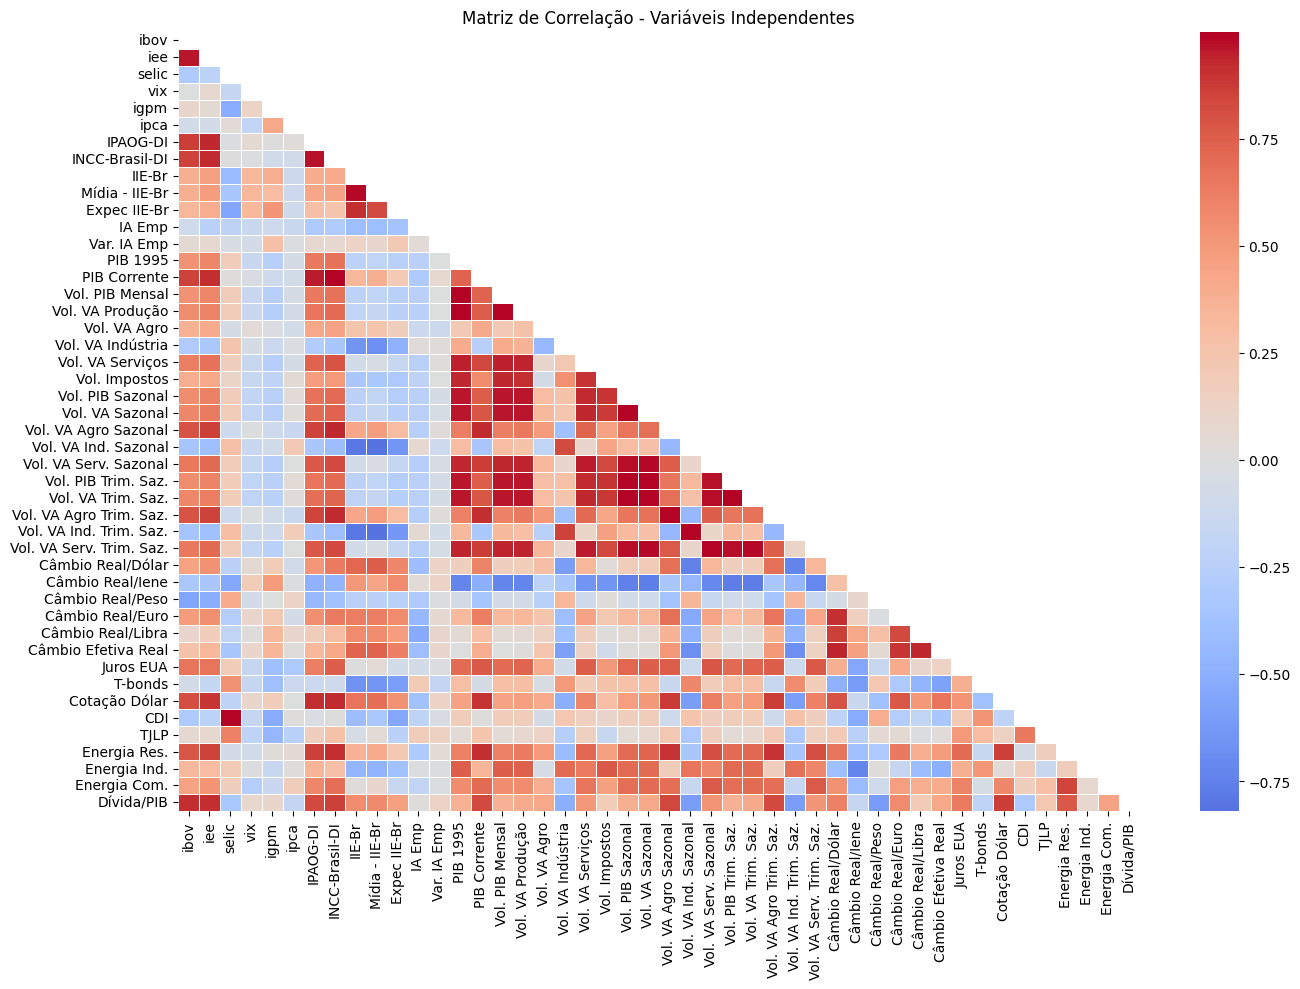

In [254]:
# Matriz de correlação dos índices estacionários normalizados
df_corr = indices_norm_estac.select_dtypes(include='number').corr(method='pearson')

# Heatmap (triângulo inferior) para facilitar a leitura
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.triu(np.ones_like(df_corr, dtype=bool))
plt.figure(figsize=(14, 10))
sns.heatmap(df_corr, mask=mask, cmap='coolwarm', center=0, annot=False, linewidths=.5)
plt.title('Matriz de Correlação - Variáveis Independentes')
plt.tight_layout()
plt.show()

# (Opcional) exportar para CSV
# df_corr.to_csv('matriz_correlacao_indices_norm_estac.csv', encoding='utf-8-sig')
# ...existing code...

Correlação cruzada entre os índices 

In [255]:
# Calcular a Função de Correlação Cruzada (CCF) entre todas as colunas de indices_norm_estac
ccf_dict = {}
columns = indices_norm_estac.columns

# Número de observações para o cálculo do intervalo de confiança
n_obs = len(indices_norm_estac)
# Intervalo de confiança (aproximado) de 95%
conf_interval = 1.96 / np.sqrt(n_obs)

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col_x = columns[i]
        col_y = columns[j]
        serie_x = indices_norm_estac[col_x].dropna()
        serie_y = indices_norm_estac[col_y].dropna()
        min_len = min(len(serie_x), len(serie_y))
        # Garantir mesmo tamanho
        serie_x = serie_x.iloc[:min_len]
        serie_y = serie_y.iloc[:min_len]
        ccf_result = ccf(serie_x, serie_y, adjusted=False)
        ccf_dict[(col_x, col_y)] = ccf_result

        # Exemplo de plot para cada par (opcional, pode comentar se não quiser muitos gráficos)
        # plt.figure(figsize=(10, 4))
        # plt.stem(range(len(ccf_result)), ccf_result, use_line_collection=True)
        # plt.title(f'CCF: {col_x} vs {col_y}')
        # plt.axhline(conf_interval, color='red', linestyle='--', label='Intervalo de Confiança (95%)')
        # plt.axhline(-conf_interval, color='red', linestyle='--')
        # plt.xlabel('Lags')
        # plt.ylabel('Correlação Cruzada')
        # plt.show()    
        

In [256]:
ccf_dict.keys()

dict_keys([('ibov', 'iee'), ('ibov', 'selic'), ('ibov', 'vix'), ('ibov', 'igpm'), ('ibov', 'ipca'), ('ibov', 'IPAOG-DI'), ('ibov', 'INCC-Brasil-DI'), ('ibov', 'IIE-Br'), ('ibov', 'Mídia - IIE-Br'), ('ibov', 'Expec IIE-Br'), ('ibov', 'IA Emp'), ('ibov', 'Var. IA Emp'), ('ibov', 'PIB 1995'), ('ibov', 'PIB Corrente'), ('ibov', 'Vol. PIB Mensal'), ('ibov', 'Vol. VA Produção'), ('ibov', 'Vol. VA Agro'), ('ibov', 'Vol. VA Indústria'), ('ibov', 'Vol. VA Serviços'), ('ibov', 'Vol. Impostos'), ('ibov', 'Vol. PIB Sazonal'), ('ibov', 'Vol. VA Sazonal'), ('ibov', 'Vol. VA Agro Sazonal'), ('ibov', 'Vol. VA Ind. Sazonal'), ('ibov', 'Vol. VA Serv. Sazonal'), ('ibov', 'Vol. PIB Trim. Saz.'), ('ibov', 'Vol. VA Trim. Saz.'), ('ibov', 'Vol. VA Agro Trim. Saz.'), ('ibov', 'Vol. VA Ind. Trim. Saz.'), ('ibov', 'Vol. VA Serv. Trim. Saz.'), ('ibov', 'Câmbio Real/Dólar'), ('ibov', 'Câmbio Real/Iene'), ('ibov', 'Câmbio Real/Peso'), ('ibov', 'Câmbio Real/Euro'), ('ibov', 'Câmbio Real/Libra'), ('ibov', 'Câmbio Ef

Análise de correlação cruzada dos índices

In [257]:
# ...existing code...
def ccf_dict_to_df(ccf_dict, conf_interval=None, lag_max=None):
    """
    Converte um dicionário de CCF (ccf_dict) em um DataFrame longo.
    Aceita chaves com 2 itens (Var_X, Var_Y) ou 3 itens (Var_X, Empresa, Indicador).

    Parâmetros:
      - ccf_dict: {(k1, k2[, k3]): np.ndarray de CCF por lag}
      - conf_interval: limiar de significância (ex.: 1.96 / sqrt(n_obs)). Se None, não marca significância.
      - lag_max: inteiro opcional para limitar os lags (ex.: 8)

    Retorna:
      - df_ccf_all: DataFrame com colunas ['Var_X','Var_Y'] ou ['Var_X','Empresa','Indicador'], 'Lag','CCF','Abs_CCF', 'Significativo' (se conf_interval)
      - df_ccf_sig: subconjunto apenas dos lags significativos (se conf_interval), senão retorna cópia de df_ccf_all
    """
    records = []
    for key, arr in ccf_dict.items():
        # Detecta a forma da chave
        if isinstance(key, tuple) and len(key) == 2:
            var_x, var_y = key
            base = {'Var_X': var_x, 'Var_Y': var_y}
        elif isinstance(key, tuple) and len(key) == 3:
            var_x, empresa, indicador = key
            base = {'Var_X': var_x, 'Empresa': empresa, 'Indicador': indicador}
        else:
            base = {'Key': str(key)}  # fallback

        for lag, val in enumerate(arr):
            if lag_max is not None and lag > lag_max:
                break
            rec = dict(base)
            rec.update({
                'Lag': lag,
                'CCF': float(val),
                'Abs_CCF': float(abs(val)),
            })
            records.append(rec)

    df_ccf_all = pd.DataFrame(records)
    if conf_interval is not None and not df_ccf_all.empty:
        df_ccf_all['Significativo'] = df_ccf_all['Abs_CCF'] > conf_interval

    if 'Significativo' in df_ccf_all.columns:
        df_ccf_sig = df_ccf_all[df_ccf_all['Significativo']].copy()
    else:
        df_ccf_sig = df_ccf_all.copy()

    return df_ccf_all, df_ccf_sig


def resumir_melhor_lag(df_ccf):
    """
    Retorna, por par, o lag com maior |CCF|.
    Funciona tanto para (Var_X, Var_Y) quanto para (Var_X, Empresa, Indicador).
    """
    if {'Var_X', 'Var_Y'}.issubset(df_ccf.columns):
        group_cols = ['Var_X', 'Var_Y']
    elif {'Var_X', 'Empresa', 'Indicador'}.issubset(df_ccf.columns):
        group_cols = ['Var_X', 'Empresa', 'Indicador']
    else:
        # fallback: tenta 'Key'
        group_cols = ['Key']

    if df_ccf.empty:
        return df_ccf.copy()

    idx = df_ccf.groupby(group_cols)['Abs_CCF'].idxmax()
    best = (df_ccf.loc[idx, group_cols + ['Lag', 'CCF', 'Abs_CCF']]
            .sort_values('Abs_CCF', ascending=False)
            .reset_index(drop=True))
    if 'Significativo' in df_ccf.columns:
        best = best.merge(df_ccf[group_cols + ['Lag', 'Significativo']],
                          on=group_cols + ['Lag'], how='left')
    return best


# Exemplo de uso com o ccf_dict já calculado acima:
# Usa o mesmo conf_interval definido anteriormente e limita lags até 8, se desejar.
df_ccf_all, df_ccf_sig = ccf_dict_to_df(ccf_dict, conf_interval=conf_interval, lag_max=8)
df_ccf_best = resumir_melhor_lag(df_ccf_sig if 'Significativo' in df_ccf_sig.columns else df_ccf_all)

# Visualizar/resumo
display(df_ccf_all.head())
display(df_ccf_sig.head())
display(df_ccf_best.head(20))

# (Opcional) salvar em CSV
df_ccf_all.to_csv('ccf_resultados_all.csv', index=False, encoding='utf-8-sig')
df_ccf_sig.to_csv('ccf_resultados_significativos.csv', index=False, encoding='utf-8-sig')
df_ccf_best.to_csv('ccf_melhor_lag_por_par.csv', index=False, encoding='utf-8-sig')
# ...existing code...

,Var_X,Var_Y,Lag,CCF,Abs_CCF,Significativo
0,ibov,iee,0,0.963734,0.963734,True
1,ibov,iee,1,0.900418,0.900418,True
2,ibov,iee,2,0.869535,0.869535,True
3,ibov,iee,3,0.817486,0.817486,True
4,ibov,iee,4,0.775753,0.775753,True


,Var_X,Var_Y,Lag,CCF,Abs_CCF,Significativo
0,ibov,iee,0,0.963734,0.963734,True
1,ibov,iee,1,0.900418,0.900418,True
2,ibov,iee,2,0.869535,0.869535,True
3,ibov,iee,3,0.817486,0.817486,True
4,ibov,iee,4,0.775753,0.775753,True


,Var_X,Var_Y,Lag,CCF,Abs_CCF,Significativo
0,PIB 1995,Vol. PIB Mensal,0,1.000000,1.000000,True
1,Vol. PIB Trim. Saz.,Vol. VA Trim. Saz.,0,0.998658,0.998658,True
2,Vol. PIB Sazonal,Vol. VA Sazonal,0,0.998643,0.998643,True
3,selic,CDI,0,0.998534,0.998534,True
4,Vol. VA Serv. Sazonal,Vol. VA Serv. Trim. Saz.,0,0.998307,0.998307,True
5,Vol. PIB Sazonal,Vol. PIB Trim. Saz.,0,0.998235,0.998235,True
6,Vol. VA Sazonal,Vol. VA Trim. Saz.,0,0.998004,0.998004,True
7,Vol. PIB Mensal,Vol. VA Produção,0,0.997305,0.997305,True
8,PIB 1995,Vol. VA Produção,0,0.997305,0.997305,True
9,Vol. PIB Sazonal,Vol. VA Trim. Saz.,0,0.997163,0.997163,True


In [258]:
# Verificar se os valores de CCF são maiores que o intervalo de confiança
pares_significativos = {}

for par, ccf_result in ccf_dict.items():
    # Verifica se algum valor da CCF excede o intervalo de confiança (positivo ou negativo)
    significativos = np.where(np.abs(ccf_result) > conf_interval)[0]
    if len(significativos) > 0:
        pares_significativos[par] = ccf_result[significativos]
        print(f"{par}: Lags significativos encontrados nos índices {significativos}, valores: {ccf_result[significativos]}")

('ibov', 'iee'): Lags significativos encontrados nos índices [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45], valores: [ 0.96373405  0.90041782  0.86953464  0.81748645  0.7757528   0.7461007
  0.70637563  0.67700086  0.62029543  0.58582384  0.52948231  0.47389295
  0.428949    0.37105166  0.30764251 -0.26207969 -0.27886563 -0.30232405
 -0.32463014 -0.34671    -0.36995459 -0.38464744 -0.39020004 -0.39031759
 -0.39237885 -0.38239932 -0.37339422 -0.36571087 -0.35107911 -0.33092896
 -0.33829254 -0.33591506 -0.32492311 -0.29909687 -0.27534641]
('ibov', 'selic'): Lags significativos encontrados nos índices [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 29 30 31], valores: [-0.29745039 -0.30847392 -0.3109917  -0.30682298 -0.30521644 -0.30871695
 -0.31977191 -0.33976068 -0.36034358 -0.38561501 -0.41250268 -0.43158677
 -0.43540508 -0.4083515  -0.36212339 -0.294257    0.26483649  0.27599623
  0.26711603]
('ibov', 'vix'): Lags signific

Correlação cruzada entre os índices e indicadores

O foco de predição será nos indicadores:
* 3.01 (Receitas de venda de Bens e/ou Serviços)
* 3.02 (Custo dos Bens e/ou Serviços)
* 3.11 (Lucro ou Prejuízo consolidado do Período)

In [259]:
dados_indicadores_transm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 233
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CD_CVM        236 non-null    int64  
 1   DENOM_CIA     236 non-null    object 
 2   DT_FIM_EXERC  236 non-null    object 
 3   3.01          236 non-null    float64
 4   3.02          236 non-null    float64
 5   3.03          236 non-null    float64
 6   3.04          236 non-null    float64
 7   3.05          236 non-null    float64
 8   3.06          236 non-null    float64
 9   3.07          236 non-null    float64
 10  3.08          236 non-null    float64
 11  3.09          236 non-null    float64
 12  3.11          236 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 25.8+ KB


Matriz de correlação entre indicadores (PEARSON)

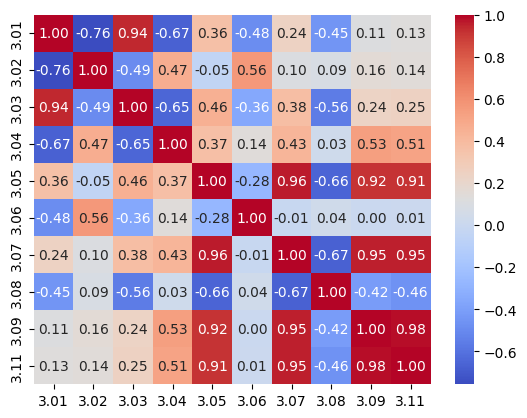

In [260]:
#realizar a correlação entre os indicadores do dataframe dados_indicadores_transm
correlacao = dados_indicadores_transm.iloc[:,3:].corr()
heatmap = sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm')

# Montando dataframes de indicadores específicos

In [261]:
def criar_dataframe_indicador(df, coluna_valor):
    """
    Cria um dataframe pivotado onde a coluna 'DT_FIM_EXERC' é o índice
    e cada coluna corresponde ao valor da coluna especificada (coluna_valor)
    de cada empresa (CD_CVM).

    Parâmetros:
      df: DataFrame original com as colunas 'CD_CVM', 'DT_FIM_EXERC' e a coluna desejada.
      coluna_valor: Nome da coluna que será utilizada para os valores (ex.: 'Resultado Bruto').

    Retorna:
      Um DataFrame pivotado.
    """
    resultado = pd.DataFrame()
    for cd_cvm in df['CD_CVM'].unique():
        df_temp = df.loc[df['CD_CVM'] == cd_cvm, ['DT_FIM_EXERC', coluna_valor]].copy()
        df_temp = df_temp.rename(columns={coluna_valor: cd_cvm})
        df_temp = df_temp.set_index('DT_FIM_EXERC')
        if resultado.empty:
            resultado = df_temp.copy()
        else:
            resultado = resultado.join(df_temp, how='outer')

    # Preencher valores NaN com 0
    resultado.fillna(0, inplace=True)
    
    return resultado

In [262]:
resultado_bruto = criar_dataframe_indicador(dados_indicadores_transm, '3.01')
lucro_consolidado = criar_dataframe_indicador(dados_indicadores_transm, '3.11')
despesas_operacionais = criar_dataframe_indicador(dados_indicadores_transm, '3.04')

In [263]:
dados_indicadores_transm['CD_CVM'].unique()

array([ 2437, 18376, 20257, 21490], dtype=int64)

Teste de estacionariedade KPSS
-   **Hipótese Nula (H0)**: A série é estacionária.
-   **Hipótese Alternativa (Ha)**: A série não é estacionária.

Teste de estacionariedade ADF
-   **Hipótese Nula (H0)**: A série não é estacionária.
-   **Hipótese Alternativa (Ha)**: A série é estacionária.

obs: utilizando dois métodos distintos para confirmar a estacionariedade

In [264]:
def teste_dados_estacionarios(series):
    dados_estacionarios_kpss = {}
    dados_estacionarios_adf = {}
    for cd_cvm, serie in series.items():
        print(cd_cvm)
        kpss_stat, p_value, lags, critical_values = kpss(serie)
        
        print(f'Estatística do teste: {kpss_stat:.4f}')
        print(f'p-valor: {p_value:.4f}')
        print('Valores Críticos:')
        for key, value in critical_values.items():
            print(f'{key}: {value:.4f}')
        print('Resultado:')
        if p_value > 0.05:
            #dados_estacionarios_kpss[cd_cvm] = p_value
            dados_estacionarios_kpss[cd_cvm] = 'S'
        else:
            #dados_estacionarios_kpss[cd_cvm] = p_value
            dados_estacionarios_kpss[cd_cvm] = 'N'

        adf_result = adfuller(serie)

        print('ADF Statistic: %f' % adf_result[0])
        print('p-value: %f' % adf_result[1])
        # Optionally, inspect the critical values
        for key, value in adf_result[4].items():
            print(f'Critical Value ({key}): {value:.4f}')

        if adf_result[1] < 0.05:
            #dados_estacionarios_adf[cd_cvm] = adf_result[1]
            dados_estacionarios_adf[cd_cvm] = 'N'
        else:
            dados_estacionarios_adf[cd_cvm] = 'S'

        df_dados_estacionarios_KPSS = pd.DataFrame.from_dict(dados_estacionarios_kpss, orient='index', columns=['KPSS'])
        df_dados_estacionarios_ADF = pd.DataFrame.from_dict(dados_estacionarios_adf, orient='index', columns=['ADF'])
        
    return df_dados_estacionarios_KPSS.join(df_dados_estacionarios_ADF)


In [265]:
resultado_bruto_estacionariedade = teste_dados_estacionarios(resultado_bruto)
lucro_consolidado_estacionariedade = teste_dados_estacionarios(lucro_consolidado)
despesas_operacionais_estacionariedade = teste_dados_estacionarios(despesas_operacionais)

2437
Estatística do teste: 0.0743
p-valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
ADF Statistic: -7.333620
p-value: 0.000000
Critical Value (1%): -3.5485
Critical Value (5%): -2.9128
Critical Value (10%): -2.5941
18376
Estatística do teste: 0.7794
p-valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
ADF Statistic: -6.623794
p-value: 0.000000
Critical Value (1%): -3.5485
Critical Value (5%): -2.9128
Critical Value (10%): -2.5941
20257
Estatística do teste: 0.9872
p-valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
ADF Statistic: -0.974481
p-value: 0.762458
Critical Value (1%): -3.5529
Critical Value (5%): -2.9147
Critical Value (10%): -2.5951
21490
Estatística do teste: 0.8167
p-valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
ADF Statistic: -2.209801
p-value: 0.202707
Critical Value (1%): -3.5485
Critical Value (5%): -2.9128

C:\Users\giova\AppData\Local\Temp\ipykernel_21444\1895746674.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(serie)
C:\Users\giova\AppData\Local\Temp\ipykernel_21444\1895746674.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(serie)
C:\Users\giova\AppData\Local\Temp\ipykernel_21444\1895746674.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(serie)
C:\Users\giova\AppData\Local\Temp\ipykernel_21444\1895746674.py:6: InterpolationWarning: The test statistic is outside of th

Para os dados não estacionários, encontrar o componente integrativo do modelo

In [266]:
def separar_dados_estacionarios(df_estacionariedade, series):
    """
    Separa os dados estacionários e não estacionários de um DataFrame.
    
    Parâmetros:
      df: DataFrame com os resultados dos testes de estacionariedade.
      
    Retorna:
      Dois DataFrames: um com dados estacionários e outro com dados não estacionários.
    """
    df_estacionarios = df_estacionariedade.query('KPSS == "S" and ADF == "S" ')
    df_nao_estacionarios = df_estacionariedade.query('KPSS == "N" or ADF == "N" ')
    
    lista_estacionarios = df_estacionarios.index.tolist()
    lista_nao_estacionarios = df_nao_estacionarios.index.tolist()

    series_estacionarios = series[lista_estacionarios]
    series_nao_estacionarios = series[lista_nao_estacionarios]

    return series_estacionarios, series_nao_estacionarios

Iniciar fluxo de dados estacionários

In [267]:
# Filtrar o dataframe resultado_bruto usando esses valores (como nomes das colunas)
resultado_bruto_estacionario, resultado_bruto_nao_estacionario = separar_dados_estacionarios(resultado_bruto_estacionariedade, resultado_bruto)
lucro_consolidado_estacionario, lucro_consolidado_nao_estacionario = separar_dados_estacionarios(lucro_consolidado_estacionariedade, lucro_consolidado)
despesas_operacionais_estacionario, despesas_operacionais_nao_estacionario = separar_dados_estacionarios(despesas_operacionais_estacionariedade, despesas_operacionais)



In [268]:
resultado_bruto_nao_estacionario.columns
resultado_bruto_estacionario.columns

Index([], dtype='int64')

Armazenar valor do componente de integração para cada série temporal

In [269]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def nivel_integracao(series):

    integration_level = {}  # Will store the integration order for each series
    series_corrigido = pd.DataFrame()

    for col in series.columns:
        serie = series[col]
        
        # Apply first-order differencing
        diff1 = serie.diff().dropna()
        adf_result1 = adfuller(diff1)
        
        if adf_result1[1] < 0.05:
            integration_level[col] = 1  # Series became stationary after 1st diff.
            series[col] = diff1
            print(f'{col}: Estacionário depois da primeira diferenciação (I=1)')
        else:
            # Aplicar diferenciação de segunda ordem
            diff2 = diff1.diff().dropna()
            adf_result2 = adfuller(diff2)
            integration_level[col] = 2  # Even after 1st diff, not stationary; use 2nd diff.
            series[col] = diff2
            print(f'{col}: Estaionário depois da segunda diferenciação (I=2) -- p-value: {adf_result2[1]:.4f}')

    print("\nIntegration levels:", integration_level)
    df_integration_level = pd.DataFrame.from_dict(integration_level, orient='index', columns=['Integration Level'])
    return df_integration_level

In [270]:
nivel_int_resultado_bruto = nivel_integracao(resultado_bruto_nao_estacionario)
nivel_int_lucro_consolidado = nivel_integracao(lucro_consolidado_nao_estacionario)
nivel_int_despesas_operacionais = nivel_integracao(despesas_operacionais_nao_estacionario)

2437: Estacionário depois da primeira diferenciação (I=1)
18376: Estacionário depois da primeira diferenciação (I=1)
20257: Estacionário depois da primeira diferenciação (I=1)
21490: Estacionário depois da primeira diferenciação (I=1)

Integration levels: {2437: 1, 18376: 1, 20257: 1, 21490: 1}
2437: Estacionário depois da primeira diferenciação (I=1)
18376: Estacionário depois da primeira diferenciação (I=1)
20257: Estacionário depois da primeira diferenciação (I=1)
21490: Estacionário depois da primeira diferenciação (I=1)

Integration levels: {2437: 1, 18376: 1, 20257: 1, 21490: 1}
2437: Estacionário depois da primeira diferenciação (I=1)
18376: Estacionário depois da primeira diferenciação (I=1)
20257: Estacionário depois da primeira diferenciação (I=1)
21490: Estaionário depois da segunda diferenciação (I=2) -- p-value: 0.0002

Integration levels: {2437: 1, 18376: 1, 20257: 1, 21490: 2}


Analise ACF e PACF para séries estacionárias - fluxo para dados estacionarios

Algoritmo

In [271]:
def analisar_componentes_arima(serie, nlags=10, alpha=0.05):
    """
    Analisa os componentes AR e MA de uma série temporal.

    Parâmetros:
    - serie: pandas Series ou array-like com a série temporal estacionária.
    - nlags: número de lags para avaliar.
    - alpha: nível de significância (default = 5%).

    Retorna:
    - Um dicionário com a conclusão sobre os componentes AR (p) e MA (q).
    """
    
    # Calcular ACF e PACF com intervalos de confiança
    acf_values, acf_interval = acf(serie, nlags=nlags, alpha=alpha)
    # Calcular ACF e PACF com intervalos de confiança
    pacf_values, pacf_interval= pacf(serie, nlags=nlags, alpha=alpha)

    N = len(serie)
    z = norm.ppf(1 - alpha/2)  # por exemplo, 1.96 para 95% de confiança
    
    # Inicializa o array dos intervalos de confiança
    ci_acf = np.zeros((nlags+1, 2))
    ci_pacf = np.zeros((nlags+1, 2))
    
    # Para o lag zero, o ACF é 1 e não calculamos intervalo (ou pode ser [0,0])
    ci_acf[0] = [0, 0]
    ci_pacf[0] = [0, 0]
    
    # Calcula os intervalos para cada lag > 0 usando a fórmula de Bartlett
    for k in range(1, nlags+1):
        var = (1.0 / N) * (1 + 2 * np.sum( acf_values[1:k]**2 ))
        margin = z * np.sqrt(var)
        ci_acf[k] = [-margin, margin]

        # Calcula os intervalos para cada lag > 0 usando a fórmula de Bartlett
    for k in range(1, nlags+1):
        var = (1.0 / N) * (1 + 2 * np.sum( pacf_values[1:k]**2 ))
        margin = z * np.sqrt(var)
        ci_pacf[k] = [-margin, margin]
        
    # Função auxiliar para determinar o maior lag significativo
    def obter_ordem(values, confint):
        ordem = 0
        for lag in range(1, len(values)):  # Ignora lag 0
            if (values[lag] < confint[lag][0]) or (values[lag] > confint[lag][1]):
                ordem = lag
            else:
                # Se o primeiro não significativo aparecer, interrompe
                break
        return ordem

    # Determinar p e q
    #print("Valores ACF:", acf_values)
    #print("Valores PACF:", pacf_values)
    #print("Intervalos de Confiança ACF:", ci_acf)
    #print("Intervalos de Confiança PACF:", ci_pacf)
    p = obter_ordem(pacf_values, ci_pacf)
    q = obter_ordem(acf_values, ci_acf)

    # Construir conclusão
    conclusao = {
        'AR (p)': p,
        'MA (q)': q,
        'Interpretacao': f"O modelo sugerido é ARIMA({p}, d, {q}), onde d é definido pela análise de estacionariedade."
    }

    return p, q, conclusao


Montando variações de ARIMA para cada empresa

In [272]:
def componentes_arima(serie_temporal, nivel_int_serie):
    resultados = []
    for cd_cvm, series in serie_temporal.items():
        p,q, retorno = analisar_componentes_arima(series)
       # print(f'CD_CVM: {cd_cvm}')
       # print(f'AR(p): {p}, MA(q): {q}')
        serie_temporal_arima_dict = {}
        serie_temporal_arima_dict['CD_CVM'] = cd_cvm
        
        serie_temporal_arima = pd.DataFrame()
        if p == 0 and q == 0:
            #print('Setando p=1 para existir pelo menos um modelo AR')
            p = 1 
            q = 1
        resultados.append({
            'CD_CVM': cd_cvm,
            'AR(p)': p,
            'MA(q)': q
        })

    df_componentes = pd.DataFrame(resultados).set_index('CD_CVM')

    #Juntando componente integrativo com os componentes AR e MA
    df_componentes_arima = pd.concat([nivel_int_serie, df_componentes], axis=1)
    df_componentes_arima.columns = ['I(d)', 'AR(p)', 'MA(q)']
    df_componentes_arima.fillna(0, inplace=True)
    df_componentes_arima['I(d)'] = df_componentes_arima['I(d)'].astype(int)
    print(df_componentes_arima)
    return df_componentes_arima

In [273]:
def gera_modelo_arima(serie_temporal, df_componentes):
    # Dicionário para armazenar os modelos ajustados para cada CD_CVM
    modelos_arima = {}

    for cd_cvm in df_componentes.index:
        # Split dos dados em treino/validação e teste
        n = len(serie_temporal)
        split_point = int(n * 0.8) 

        p = df_componentes.loc[cd_cvm, 'AR(p)']
        q = df_componentes.loc[cd_cvm, 'MA(q)']
        i = df_componentes.loc[cd_cvm, 'I(d)']
        # Como as séries já são estacionárias, definimos d = 0
        order = (p, i, q)

        serie = serie_temporal[cd_cvm].iloc[:split_point]
        
        try:
            modelo = ARIMA(serie, order=order).fit()
            modelos_arima[cd_cvm] = modelo
            print(f'Modelo ARIMA({p}, {i}, {q}) para CD_CVM {cd_cvm} ajustado com sucesso.')
            print(modelo.summary())
        except Exception as e:
            print(f'Erro ao ajustar modelo para CD_CVM {cd_cvm}: {str(e)}')

    return modelos_arima

In [274]:
def adicionar_lags(df, lags=4):
    frames = df.copy()  # copia do DataFrame original
    for lag in range(1, lags + 1):
        lagged = df.shift(lag).copy()
        lagged.columns = [f"{col}_lag{lag}" for col in df.columns]
        frames = pd.concat([frames, lagged], axis=1)
    return frames

In [275]:
resultado_bruto_comp_arima = componentes_arima(resultado_bruto, nivel_int_resultado_bruto)
lucro_consolidado_comp_arima = componentes_arima(lucro_consolidado, nivel_int_lucro_consolidado)
despesas_operacionais_comp_arima = componentes_arima(despesas_operacionais, nivel_int_despesas_operacionais)

       I(d)  AR(p)  MA(q)
2437      1      1      1
18376     1      1      1
20257     1      1      4
21490     1      1      5
       I(d)  AR(p)  MA(q)
2437      1      1      1
18376     1      1      1
20257     1      1      4
21490     1      1      3
       I(d)  AR(p)  MA(q)
2437      1      1      1
18376     1      1      1
20257     1      1      4
21490     2      1      1


In [276]:
len(despesas_operacionais)

59

In [277]:
#aplicar normalização Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Normalizar as variáveis exógenas
# resultado_bruto_normalizado = pd.DataFrame(scaler.fit_transform(resultado_bruto), columns=resultado_bruto.columns, index=resultado_bruto.index)
# lucro_consolidado_normalizado = pd.DataFrame(scaler.fit_transform(lucro_consolidado), columns=resultado_bruto.columns, index=resultado_bruto.index)
# despesas_operacionais_normalizado = pd.DataFrame(scaler.fit_transform(despesas_operacionais), columns=resultado_bruto.columns, index=resultado_bruto.index)

# Normalizar as variáveis exógenas com z-score
resultado_bruto_normalizado = normalize_dataframe(resultado_bruto)
lucro_consolidado_normalizado = normalize_dataframe(lucro_consolidado)
despesas_operacionais_normalizado = normalize_dataframe(despesas_operacionais)

In [278]:
result_bruto_arima = gera_modelo_arima(resultado_bruto_normalizado, resultado_bruto_comp_arima)
lucro_consolidado_arima = gera_modelo_arima(lucro_consolidado_normalizado, lucro_consolidado_comp_arima)
despesas_operacionais_arima = gera_modelo_arima(despesas_operacionais_normalizado, despesas_operacionais_comp_arima)

Modelo ARIMA(1, 1, 1) para CD_CVM 2437 ajustado com sucesso.
                               SARIMAX Results                                
Dep. Variable:                   2437   No. Observations:                   47
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -72.051
Date:                Sun, 14 Sep 2025   AIC                            150.102
Time:                        10:45:04   BIC                            155.588
Sample:                    03-31-2010   HQIC                           152.157
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0359      0.452      0.079      0.937      -0.850       0.922
ma.L1         -0.9997     13.400     -0.075      0.941     -27.262    

C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Modelo ARIMA(1, 1, 4) para CD_CVM 20257 ajustado com sucesso.
                               SARIMAX Results                                
Dep. Variable:                  20257   No. Observations:                   47
Model:                 ARIMA(1, 1, 4)   Log Likelihood                 -33.738
Date:                Sun, 14 Sep 2025   AIC                             79.477
Time:                        10:45:04   BIC                             90.449
Sample:                    03-31-2010   HQIC                            83.587
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3077      0.773     -0.398      0.690      -1.822       1.207
ma.L1         -0.2257      0.738     -0.306      0.760      -1.672   

C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Modelo ARIMA(1, 1, 5) para CD_CVM 21490 ajustado com sucesso.
                               SARIMAX Results                                
Dep. Variable:                  21490   No. Observations:                   47
Model:                 ARIMA(1, 1, 5)   Log Likelihood                 -29.227
Date:                Sun, 14 Sep 2025   AIC                             72.454
Time:                        10:45:04   BIC                             85.255
Sample:                    03-31-2010   HQIC                            77.249
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8222      0.278     -2.956      0.003      -1.367      -0.277
ma.L1          0.4347     10.246      0.042      0.966     -19.646   

C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFounda

Modelo ARIMA(1, 1, 3) para CD_CVM 21490 ajustado com sucesso.
                               SARIMAX Results                                
Dep. Variable:                  21490   No. Observations:                   47
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 -50.391
Date:                Sun, 14 Sep 2025   AIC                            110.781
Time:                        10:45:04   BIC                            119.924
Sample:                    03-31-2010   HQIC                           114.206
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8832      0.423     -2.089      0.037      -1.712      -0.054
ma.L1          0.2706    142.893      0.002      0.998    -279.794   

C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Modelo ARIMA(1, 1, 4) para CD_CVM 20257 ajustado com sucesso.
                               SARIMAX Results                                
Dep. Variable:                  20257   No. Observations:                   47
Model:                 ARIMA(1, 1, 4)   Log Likelihood                 -50.230
Date:                Sun, 14 Sep 2025   AIC                            112.460
Time:                        10:45:05   BIC                            123.432
Sample:                    03-31-2010   HQIC                           116.570
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8873      0.436     -2.035      0.042      -1.742      -0.033
ma.L1          0.2160      0.393      0.550      0.582      -0.553   

In [279]:
def aplica_modelo_forecast(result_bruto_arima, resultado_bruto, exog_dict):
    """
    Aplica o modelo ARIMA ajustado para prever os próximos valores da série temporal.
    
    Parâmetros:
      resultados_arima: Dicionário com os modelos ARIMA ajustados.
      resultado_bruto: DataFrame com os dados originais para prever.
      
    Retorna:
      Um dicionário com as previsões para cada CD_CVM.
    """
    forecast_results = {}
    metrics = []
    exog_vars = None
    for cd_cvm, model in result_bruto_arima.items():
        n = len(resultado_bruto[cd_cvm])
        split_point = int(n * 0.8)  # 80% dos dados para treino
        test = resultado_bruto[cd_cvm].iloc[split_point:]  # Test set é a última parte da série
        steps = len(test)  # horizonte de previsão igual ao tamanho do conjunto de teste
        
        try:
            forecast = model.forecast(steps=steps)
            forecast_results[cd_cvm] = forecast
            actual = resultado_bruto[cd_cvm].iloc[split_point:]
        except Exception as e:
            n = len(exog_dict[cd_cvm])
            split_point = int(n * 0.8)  # 80% dos dados para treino
            print(split_point)
            test = resultado_bruto.iloc[split_point+8:]  # Test set é a última parte da série
            steps = len(test)  # horizonte de previsão igual ao tamanho do conjunto de teste
            print(steps)
            exog_forecast = exog_dict[cd_cvm].iloc[split_point:]
            print(len(exog_forecast))
            forecast = model.forecast(steps=steps, exog=exog_forecast)
            forecast_results[cd_cvm] = forecast
            print(f'Previsão para CD_CVM {cd_cvm} concluída.')
            actual = resultado_bruto[cd_cvm].iloc[split_point+8:]
        
        
        #Plotar os resultados

        plt.figure(figsize=(10, 5))
        plt.plot(actual.index, actual, label='Actual', color='blue')
        plt.plot(actual.index, forecast, label='Forecast', color='orange')
        plt.title(f'Forecast vs Real - CD_CVM {cd_cvm}')
        plt.xlabel('Data')
        plt.xticks(rotation=45)
        plt.ylabel(f'Resultado Bruto Normalizado')
        plt.legend()
        plt.show()
        rmse = np.sqrt(np.mean((actual.values - forecast.values) ** 2))
        print(f'RMSE para CD_CVM {cd_cvm}: {rmse}')
        mae = np.mean(np.abs(actual.values - forecast.values))
        metrics.append({'CD_CVM': cd_cvm, 'RMSE': rmse, 'MAE': mae})
    
    print(metrics)
    df_metrics = pd.DataFrame(metrics).set_index('CD_CVM')
    return df_metrics

In [280]:
result_bruto_arima

{2437: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x271fdc10950>,
 18376: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x271fdb81b10>,
 20257: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x271fe4ce510>,
 21490: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x271fe4f3e90>}

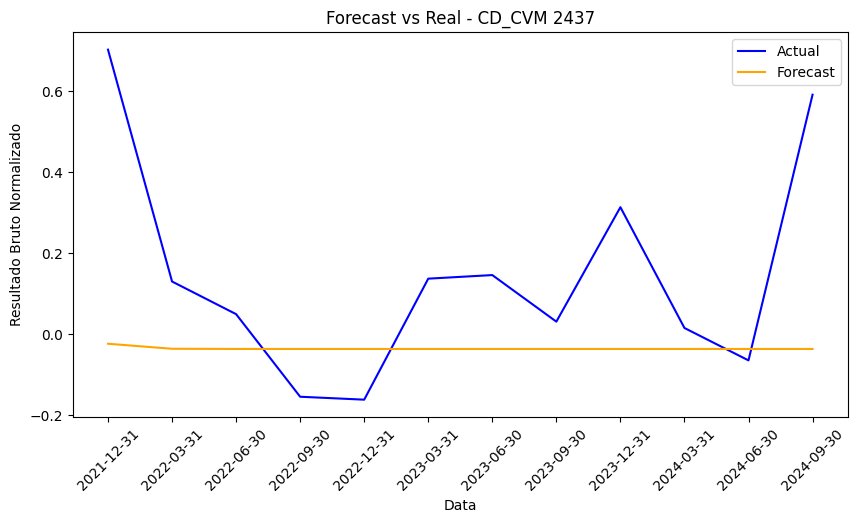

RMSE para CD_CVM 2437: 0.31356427490673794


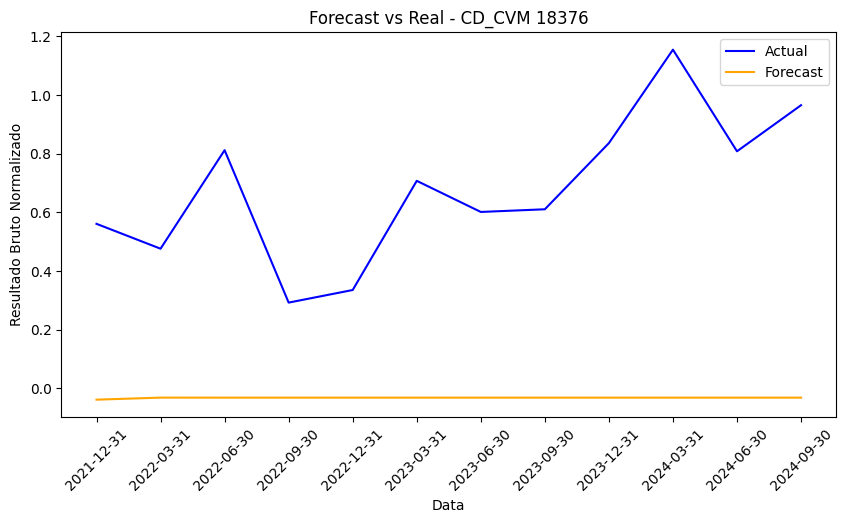

RMSE para CD_CVM 18376: 0.7518145516055631


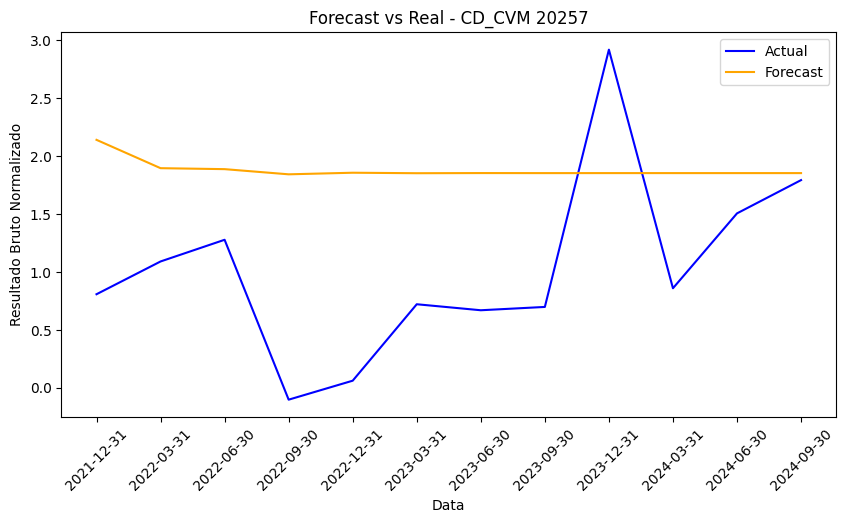

RMSE para CD_CVM 20257: 1.1571427534435874


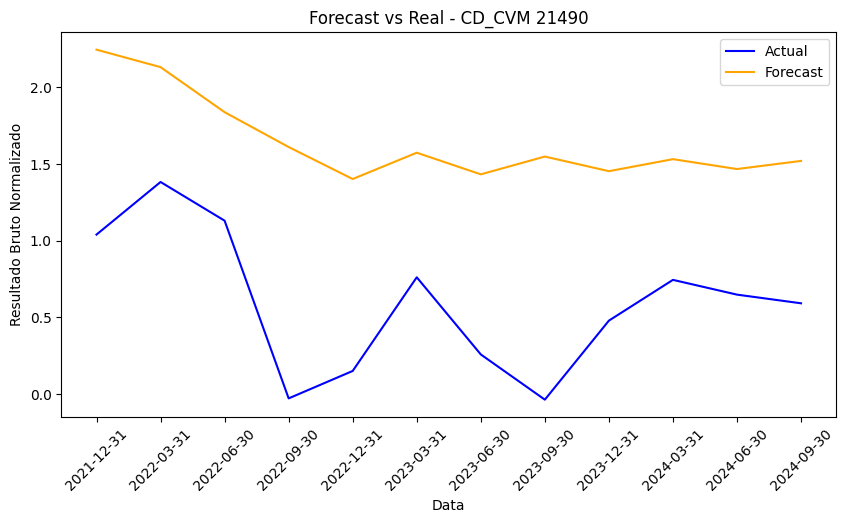

RMSE para CD_CVM 21490: 1.0949876393738218
[{'CD_CVM': 2437, 'RMSE': 0.31356427490673794, 'MAE': 0.22521618668672463}, {'CD_CVM': 18376, 'RMSE': 0.7518145516055631, 'MAE': 0.7119946783767475}, {'CD_CVM': 20257, 'RMSE': 1.1571427534435874, 'MAE': 1.035550395901237}, {'CD_CVM': 21490, 'RMSE': 1.0949876393738218, 'MAE': 1.051565687605759}]


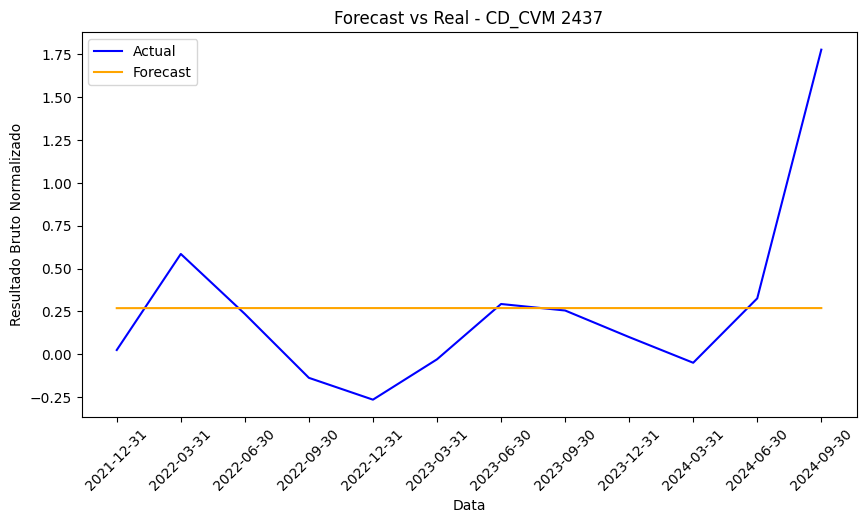

RMSE para CD_CVM 2437: 0.5091757784315583


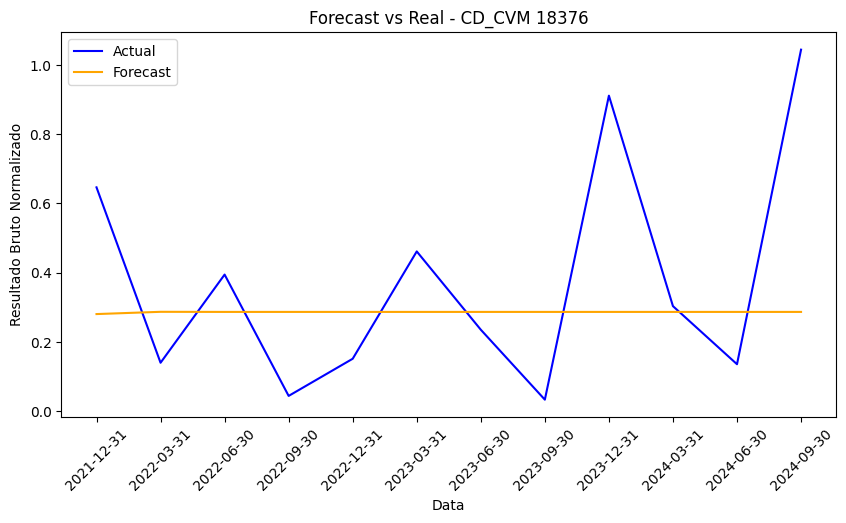

RMSE para CD_CVM 18376: 0.3330812345716022


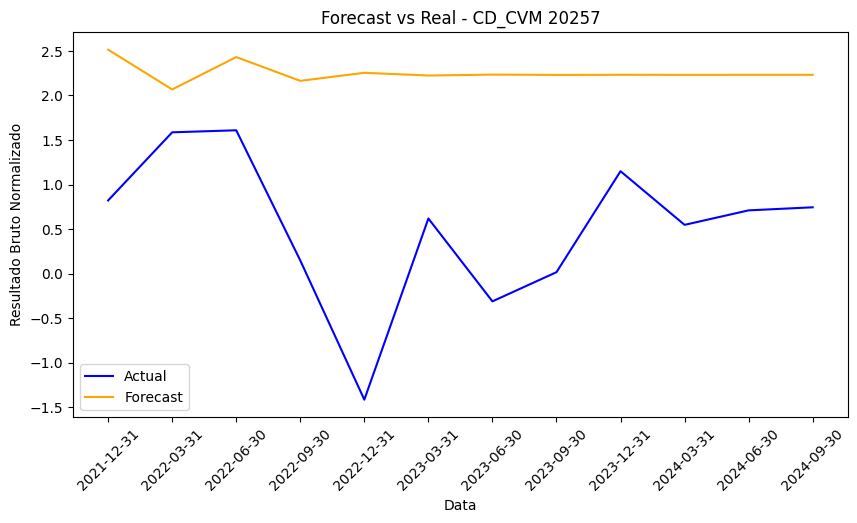

RMSE para CD_CVM 20257: 1.910034936538301


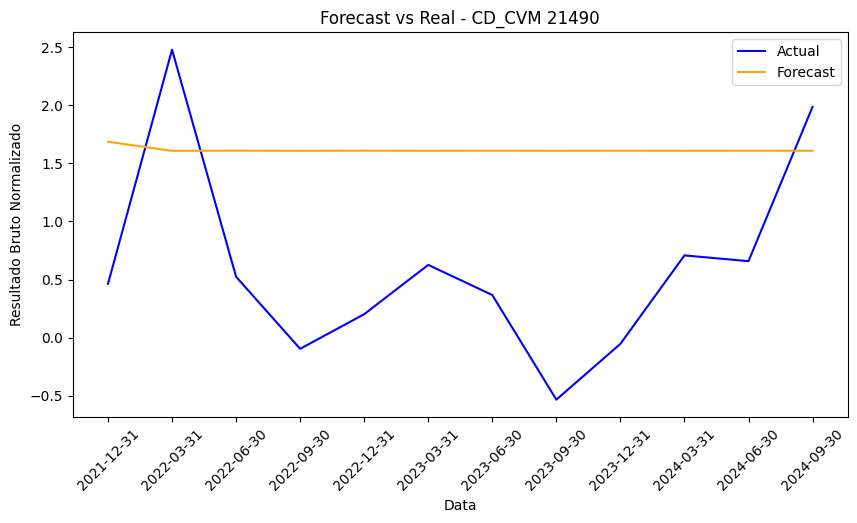

RMSE para CD_CVM 21490: 1.291268943800345
[{'CD_CVM': 2437, 'RMSE': 0.5091757784315583, 'MAE': 0.32723469420949997}, {'CD_CVM': 18376, 'RMSE': 0.3330812345716022, 'MAE': 0.2525990827037263}, {'CD_CVM': 20257, 'RMSE': 1.910034936538301, 'MAE': 1.734787135653394}, {'CD_CVM': 21490, 'RMSE': 1.291268943800345, 'MAE': 1.2115860993851897}]


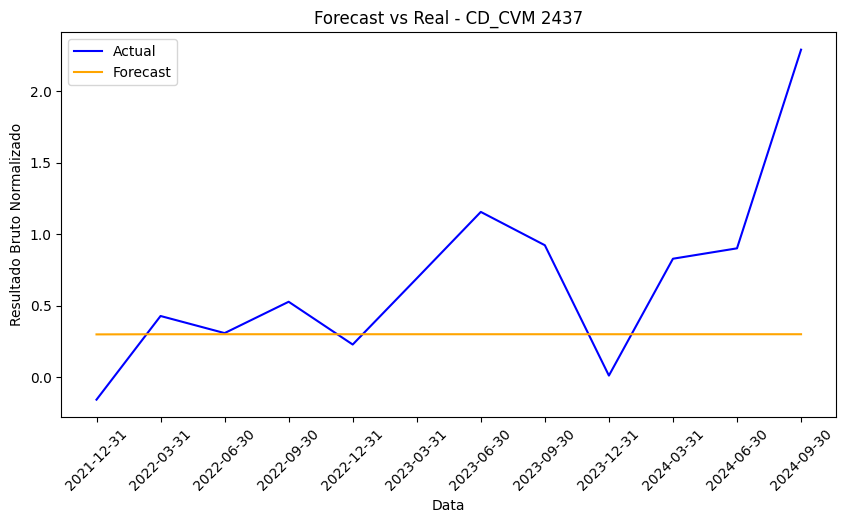

RMSE para CD_CVM 2437: 0.7206773059493208


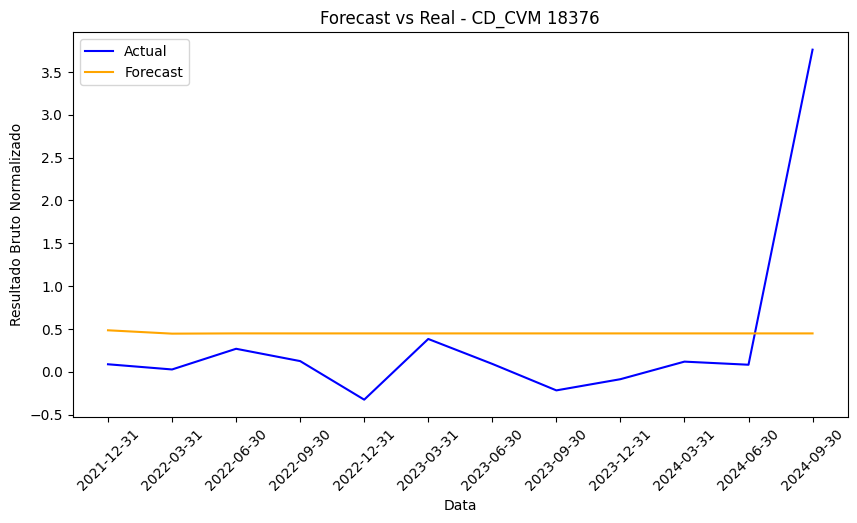

RMSE para CD_CVM 18376: 1.0466202244007035


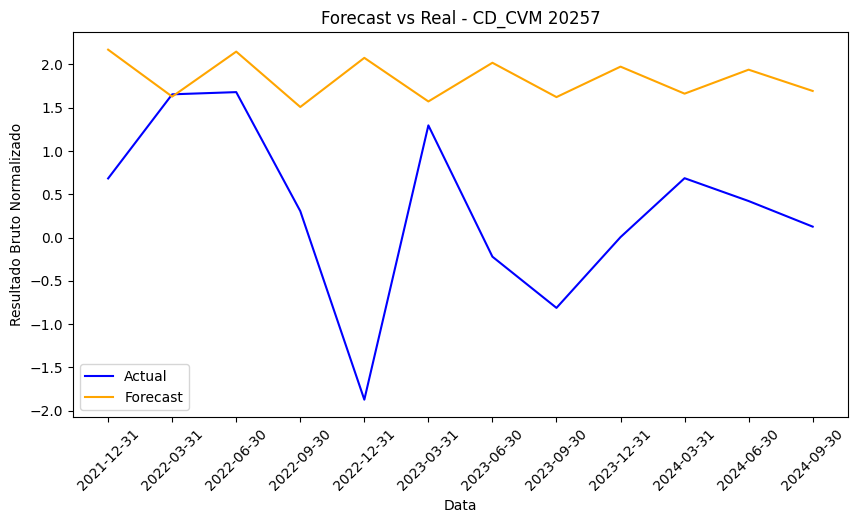

RMSE para CD_CVM 20257: 1.8276920480136714


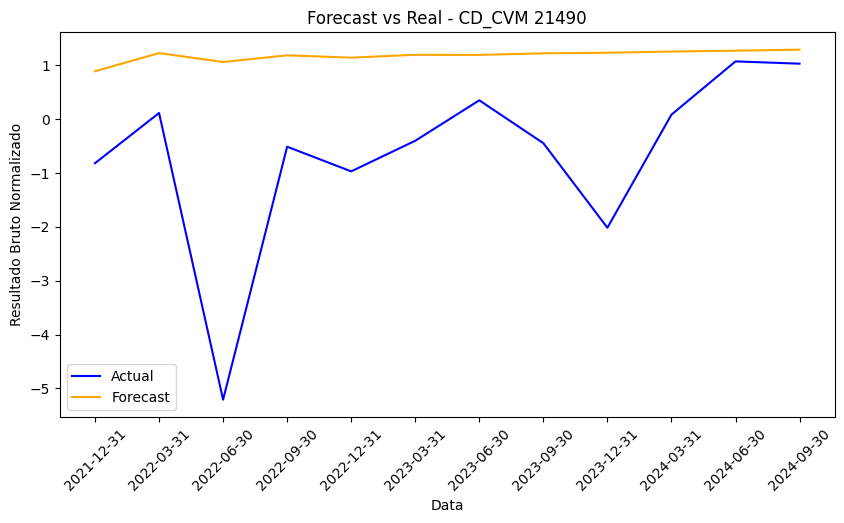

RMSE para CD_CVM 21490: 2.3965183245585715
[{'CD_CVM': 2437, 'RMSE': 0.7206773059493208, 'MAE': 0.5137724401121341}, {'CD_CVM': 18376, 'RMSE': 1.0466202244007035, 'MAE': 0.6433788461572064}, {'CD_CVM': 20257, 'RMSE': 1.8276920480136714, 'MAE': 1.5096479656139943}, {'CD_CVM': 21490, 'RMSE': 2.3965183245585715, 'MAE': 1.824303565821323}]


In [281]:
resultado_bruto_metrics = aplica_modelo_forecast(result_bruto_arima, resultado_bruto_normalizado, exog_dict=[])
lucro_consolidado_metrics = aplica_modelo_forecast(lucro_consolidado_arima, lucro_consolidado_normalizado, exog_dict=[])
despesas_operacionais_metrics = aplica_modelo_forecast(despesas_operacionais_arima, despesas_operacionais_normalizado, exog_dict=[])

In [282]:
# Cria uma lista de dicionários com os valores de AIC e BIC para cada cd_cvm -> RESULTADO BRUTO
performance = []
for cd_cvm, modelo in result_bruto_arima.items():
    performance.append({
        'CD_CVM': cd_cvm,
        'AIC': modelo.aic,
        'BIC': modelo.bic
    })

# Cria o DataFrame e define CD_CVM como índice
df_performance_resul_bruto = pd.DataFrame(performance).set_index('CD_CVM')

# Ordena o DataFrame pelo AIC (menor é melhor)
df_performance_resul_bruto = df_performance_resul_bruto.sort_values(by='AIC')
df_combined_result = df_performance_resul_bruto.join(resultado_bruto_metrics)
print(df_combined_result.sort_values(by='CD_CVM'))

               AIC         BIC      RMSE       MAE
CD_CVM                                            
2437    150.101701  155.587625  0.313564  0.225216
18376   144.307821  149.793745  0.751815  0.711995
20257    79.476775   90.448623  1.157143  1.035550
21490    72.454280   85.254769  1.094988  1.051566


In [283]:
# Cria uma lista de dicionários com os valores de AIC e BIC para cada cd_cvm -> LUCRO CONSOLIDADO
performance = []
for cd_cvm, modelo in lucro_consolidado_arima.items():
    performance.append({
        'CD_CVM': cd_cvm,
        'AIC': modelo.aic,
        'BIC': modelo.bic
    })

# Cria o DataFrame e define CD_CVM como índice
df_performance_lucro = pd.DataFrame(performance).set_index('CD_CVM')

# Ordena o DataFrame pelo AIC (menor é melhor)
df_performance_lucro = df_performance_lucro.sort_values(by='AIC')
df_combined_lucro = df_performance_lucro.join(lucro_consolidado_metrics)
print(df_combined_lucro.sort_values(by='CD_CVM'))

               AIC         BIC      RMSE       MAE
CD_CVM                                            
2437    146.453617  151.939541  0.509176  0.327235
18376   146.565924  152.051848  0.333081  0.252599
20257   110.771586  121.743435  1.910035  1.734787
21490   110.781088  119.924295  1.291269  1.211586


In [284]:
# Cria uma lista de dicionários com os valores de AIC e BIC para cada cd_cvm -> DESPESAS OPERACIONAIS
performance = []
for cd_cvm, modelo in lucro_consolidado_arima.items():
    performance.append({
        'CD_CVM': cd_cvm,
        'AIC': modelo.aic,
        'BIC': modelo.bic
    })

# Cria o DataFrame e define CD_CVM como índice
df_performance_despesas = pd.DataFrame(performance).set_index('CD_CVM')

# Ordena o DataFrame pelo AIC (menor é melhor)
df_performance_despesas = df_performance_despesas.sort_values(by='AIC')
df_combined_despesas = df_performance_despesas.join(despesas_operacionais_metrics)
print(df_combined_despesas.sort_values(by='CD_CVM'))

               AIC         BIC      RMSE       MAE
CD_CVM                                            
2437    146.453617  151.939541  0.720677  0.513772
18376   146.565924  152.051848  1.046620  0.643379
20257   110.771586  121.743435  1.827692  1.509648
21490   110.781088  119.924295  2.396518  1.824304


In [285]:
def calcula_naive_metrics(df_indicadores_norm):
    """
    Calcula forecast naive e as métricas RMSE/MAE para cada coluna de um DataFrame de séries temporais normalizadas.
    
    Parâmetros:
        df_indicadores_norm: DataFrame (índice = datas, colunas = indicadores ou empresas)
        
    Retorna:
        naive_forecast_df: DataFrame com as previsões naive
        df_naive_metrics: DataFrame com RMSE e MAE para cada coluna
    """
    naive_forecast_results = {}

    for col in df_indicadores_norm.columns:
        series = df_indicadores_norm[col]
        n = len(series)
        split_point = int(n * 0.8)
        train = series.iloc[:split_point]
        test = series.iloc[split_point:]
        forecast = pd.Series(train.iloc[-1], index=test.index)
        naive_forecast_results[col] = forecast

    naive_forecast_df = pd.DataFrame(naive_forecast_results)

    naive_metrics = []
    for col in df_indicadores_norm.columns:
        actual = df_indicadores_norm[col]
        forecast = naive_forecast_df[col]
        rmse = np.sqrt(np.mean((actual - forecast) ** 2))
        mae = np.mean(np.abs(actual - forecast))
        naive_metrics.append({'Indicador': col, 'RMSE': rmse, 'MAE': mae})

    df_naive_metrics = pd.DataFrame(naive_metrics).set_index('Indicador')
    return naive_forecast_df, df_naive_metrics

In [286]:
naive_forecast_result, df_naive_metrics_result = calcula_naive_metrics(resultado_bruto_normalizado)
naive_forecast_lucro, df_naive_metrics_lucro = calcula_naive_metrics(lucro_consolidado_normalizado)
naive_forecast_despesas, df_naive_metrics_despesas = calcula_naive_metrics(despesas_operacionais_normalizado)

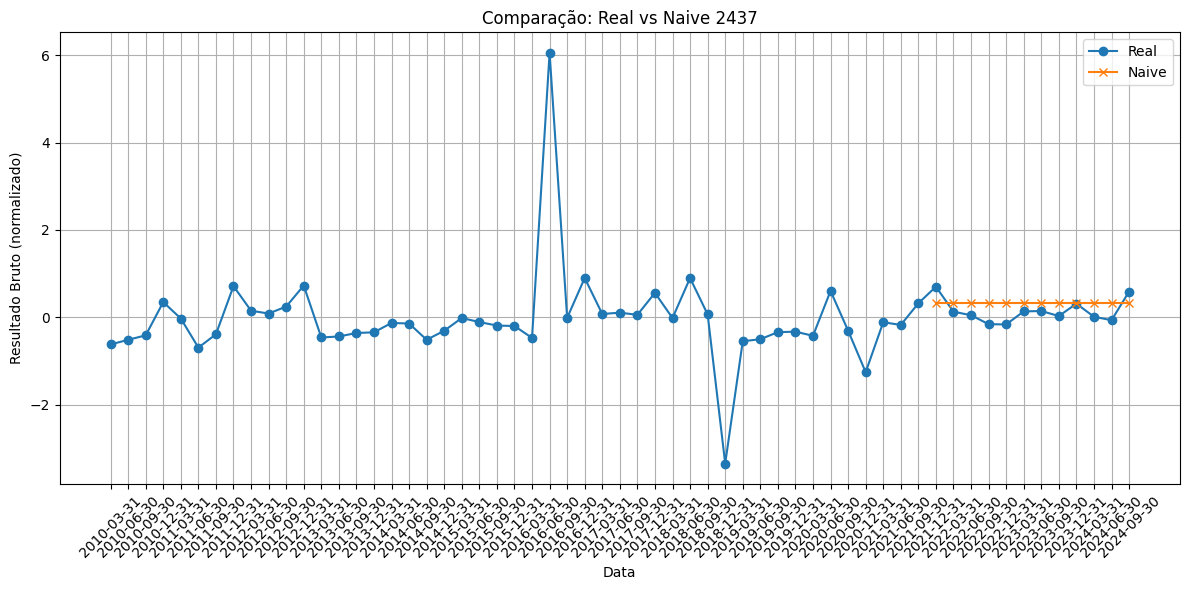

In [287]:
import matplotlib.pyplot as plt

# Plotando RMSE do ARIMA (normal) vs Naive
plt.figure(figsize=(12, 6))
plt.plot(resultado_bruto_normalizado[2437], label='Real', marker='o')
plt.plot(naive_forecast_result[2437], label='Naive', marker='x')
plt.title(f'Comparação: Real vs Naive {2437}')
plt.xlabel('Data')
plt.ylabel('Resultado Bruto (normalizado)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [288]:
# Função para adicionar as métricas Naive e melhorias em qualquer DataFrame combinado
def adiciona_metricas_naive(df_combined, df_naive_metrics):
    df_combined = df_combined.copy()
    df_combined['Naive RMSE'] = df_naive_metrics['RMSE']
    df_combined['Naive MAE'] = df_naive_metrics['MAE']
    df_combined['RMSE Improvement (%)'] = ((df_combined['Naive RMSE'] - df_combined['RMSE']) / df_combined['Naive RMSE']) * 100
    df_combined['MAE Improvement (%)'] = ((df_combined['Naive MAE'] - df_combined['MAE']) / df_combined['Naive MAE']) * 100
    return df_combined

# Aplicando para cada tabela
df_combined_result_final = adiciona_metricas_naive(df_combined_result, df_naive_metrics_result)
df_combined_lucro_final = adiciona_metricas_naive(df_combined_lucro, df_naive_metrics_lucro)
df_combined_despesas_final = adiciona_metricas_naive(df_combined_despesas, df_naive_metrics_despesas)

# Exibir as tabelas separadas
print("Resultado Bruto:")
display(df_combined_result_final.sort_values(by='CD_CVM'))
print("Lucro Consolidado:")
display(df_combined_lucro_final.sort_values(by='CD_CVM'))
print("Despesas Operacionais:")
display(df_combined_despesas_final.sort_values(by='CD_CVM'))

Resultado Bruto:


,AIC,BIC,RMSE,MAE,Naive RMSE,Naive MAE,RMSE Improvement (%),MAE Improvement (%)
CD_CVM,,,,,,,,
2437,150.101701,155.587625,0.313564,0.225216,0.314044,0.285771,0.152867,21.189996
18376,144.307821,149.793745,0.751815,0.711995,0.247411,0.200523,-203.872181,-255.068597
20257,79.476775,90.448623,1.157143,1.035550,0.970092,0.838828,-19.281742,-23.452104
21490,72.454280,85.254769,1.094988,1.051566,0.689182,0.577474,-58.882304,-82.097361


Lucro Consolidado:


,AIC,BIC,RMSE,MAE,Naive RMSE,Naive MAE,RMSE Improvement (%),MAE Improvement (%)
CD_CVM,,,,,,,,
2437,146.453617,151.939541,0.509176,0.327235,0.528151,0.319211,3.592820,-2.513737
18376,146.565924,152.051848,0.333081,0.252599,0.323498,0.275355,-2.962510,8.264207
20257,110.771586,121.743435,1.910035,1.734787,1.235026,0.985297,-54.655461,-76.067455
21490,110.781088,119.924295,1.291269,1.211586,0.844180,0.696829,-52.961345,-73.871372


Despesas Operacionais:


,AIC,BIC,RMSE,MAE,Naive RMSE,Naive MAE,RMSE Improvement (%),MAE Improvement (%)
CD_CVM,,,,,,,,
2437,146.453617,151.939541,0.720677,0.513772,0.867699,0.658972,16.943893,22.034263
18376,146.565924,152.051848,1.046620,0.643379,1.111150,0.477818,5.807488,-34.649346
20257,110.771586,121.743435,1.827692,1.509648,1.093476,0.855882,-67.145072,-76.385124
21490,110.781088,119.924295,2.396518,1.824304,2.618194,2.070282,8.466736,11.881408


## ARIMAX

In [348]:
dados_indices.info()
#exluir as 4 últimas linhas do dataframe entradas, estão como NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      59 non-null     object 
 1   ibov                      59 non-null     float64
 2   iee                       59 non-null     float64
 3   selic                     59 non-null     float64
 4   vix                       59 non-null     float64
 5   igpm                      59 non-null     float64
 6   ipca                      59 non-null     float64
 7   IPAOG-DI                  59 non-null     float64
 8   INCC-Brasil-DI            59 non-null     float64
 9   IIE-Br                    59 non-null     float64
 10  Mídia - IIE-Br            59 non-null     float64
 11  Expec IIE-Br              59 non-null     float64
 12  IA Emp                    59 non-null     float64
 13  Var. IA Emp               59 non-null     float64
 14  PIB 1995    

Reorganizando indicadores - usados nos modelos

In [349]:
#Dict com cd_cvm como chave e dataframe com os indicadores como valor
dict_indicadores = {}
for cd_cvm in dados_indicadores_transm['CD_CVM'].unique():
    df_temp = dados_indicadores_transm.copy()
    df_temp = df_temp[df_temp['CD_CVM'] == cd_cvm].copy()
    
    df_temp.drop(columns=['CD_CVM','DENOM_CIA'], inplace=True)
    df_temp.set_index('DT_FIM_EXERC', inplace=True)
    dict_indicadores[cd_cvm] = df_temp



In [336]:
for cd_cvm, df in dict_indicadores.items():
    #comparar o índice de todas as empresas no dict
    faltam_em_lista = set(dict_indicadores[2437].index) - set(df.index) 
    print(f"{cd_cvm} - {faltam_em_lista}")
    print(f"CD_CVM: {cd_cvm}, Length: {len(df.index)}")
    


2437 - set()
CD_CVM: 2437, Length: 59
18376 - set()
CD_CVM: 18376, Length: 59
20257 - set()
CD_CVM: 20257, Length: 59
21490 - set()
CD_CVM: 21490, Length: 59


Deixando indicadores estacionários para correlações

In [350]:
# Deixar os dados de dict_indicadores estacionários usando ADF, diferenciando se necessário

from statsmodels.tsa.stattools import adfuller

dict_indicadores_estac = {}

for empresa, df in dict_indicadores.items():
    df_estac = pd.DataFrame(index=df.index)
    for coluna in df.columns:
        serie = df[coluna].copy()
        diff_count = 0
        max_diff = 5  # Limite de diferenciações para evitar loop infinito
        while diff_count <= max_diff:
            print(f"{empresa} - {coluna} - {diff_count}: {len(serie)}")
            resultado = adfuller(serie)
            if resultado[1] < 0.05:
                # Série estacionária, armazena e sai do loop
                df_estac[coluna] = serie
                break
            else:
                # Diferenciação
                serie = serie.diff().dropna()
                diff_count += 1
        else:
            print(f"Atenção: {coluna} da empresa {empresa} não ficou estacionária após {max_diff} diferenciações.")
    dict_indicadores_estac[empresa] = df_estac

2437 - 3.01 - 0: 59
2437 - 3.02 - 0: 59
2437 - 3.03 - 0: 59
2437 - 3.04 - 0: 59
2437 - 3.05 - 0: 59
2437 - 3.06 - 0: 59
2437 - 3.06 - 1: 58
2437 - 3.07 - 0: 59
2437 - 3.08 - 0: 59
2437 - 3.09 - 0: 59
2437 - 3.11 - 0: 59
18376 - 3.01 - 0: 59
18376 - 3.02 - 0: 59
18376 - 3.02 - 1: 58
18376 - 3.03 - 0: 59
18376 - 3.04 - 0: 59
18376 - 3.05 - 0: 59
18376 - 3.06 - 0: 59
18376 - 3.06 - 1: 58
18376 - 3.07 - 0: 59
18376 - 3.08 - 0: 59
18376 - 3.09 - 0: 59
18376 - 3.11 - 0: 59
20257 - 3.01 - 0: 59
20257 - 3.01 - 1: 58
20257 - 3.02 - 0: 59
20257 - 3.02 - 1: 58
20257 - 3.03 - 0: 59
20257 - 3.03 - 1: 58
20257 - 3.04 - 0: 59
20257 - 3.04 - 1: 58
20257 - 3.05 - 0: 59
20257 - 3.05 - 1: 58
20257 - 3.06 - 0: 59
20257 - 3.06 - 1: 58
20257 - 3.07 - 0: 59
20257 - 3.08 - 0: 59
20257 - 3.08 - 1: 58
20257 - 3.09 - 0: 59
20257 - 3.09 - 1: 58
20257 - 3.11 - 0: 59
20257 - 3.11 - 1: 58
21490 - 3.01 - 0: 59
21490 - 3.01 - 1: 58
21490 - 3.02 - 0: 59
21490 - 3.02 - 1: 58
21490 - 3.03 - 0: 59
21490 - 3.03 - 1: 58
214

In [351]:
dict_indicadores_estac_norm = {}
for empresa in dict_indicadores_estac.keys():
    print(f"Empresa: {empresa}, Shape: {dict_indicadores_estac[empresa].shape}")
    dict_indicadores_estac_norm[empresa] = (dict_indicadores_estac[empresa] - dict_indicadores_estac[empresa].mean()) / dict_indicadores_estac[empresa].std()

Empresa: 2437, Shape: (59, 10)
Empresa: 18376, Shape: (59, 10)
Empresa: 20257, Shape: (59, 10)
Empresa: 21490, Shape: (59, 10)


In [352]:
#meça o tamanho de todas as listas do dict_indicadores
tamanhos = {k: v.shape[0] for k, v in dict_indicadores.items()}
tamanhos

{2437: 59, 18376: 59, 20257: 59, 21490: 59}

Adicionando indicadores nos inputs

In [353]:
indices_norm_estac.index = dict_indicadores_estac[empresa].index

Interpolando dados ausentes

In [354]:
# Interpolar NaNs em dict_indicadores_estac_norm[empresa] para cada empresa
for emp, df in dict_indicadores_estac_norm.items():
    before = int(df.isna().sum().sum())
    df2 = df.copy()

    # Garantir índice datetime para interpolação por tempo
    try:
        new_index = pd.to_datetime(df2.index, errors='raise')
        df2 = df2.set_index(new_index).sort_index()
        df2 = df2.interpolate(method='time', limit_direction='both', axis=0)
    except Exception:
        # Fallback para linear se índice não for datetime
        df2 = df2.sort_index().interpolate(method='linear', limit_direction='both', axis=0)

    # Opcional: se sobrar algum NaN, usar ffill/bfill nas bordas
    if df2.isna().any().any():
        df2 = df2.ffill().bfill()

    dict_indicadores_estac_norm[emp] = df2
    after = int(df2.isna().sum().sum())
    print(f"{emp}: NaNs {before} -> {after}")

# Conferir uma empresa ativa
dict_indicadores_estac_norm[empresa]
# ...existing code...

2437: NaNs 1 -> 0
18376: NaNs 2 -> 0
20257: NaNs 9 -> 0
21490: NaNs 8 -> 0


,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.11
DT_FIM_EXERC,,,,,,,,,,
2010-03-31,-0.072967,0.148705,-0.026151,0.200952,-0.007745,0.088675,0.009416,0.507452,-0.015046,-0.015046
2010-06-30,-0.072967,0.148705,-0.026151,0.354768,-0.007745,0.088675,0.009416,0.495122,-0.015046,-0.015046
2010-09-30,-0.072967,0.148705,-0.026151,0.508584,-0.007745,0.088675,0.009416,0.482793,-0.015046,-0.015046
2010-12-31,0.427839,0.638056,0.710405,0.114090,0.648430,-1.071531,0.471181,0.066851,0.362268,0.362268
2011-03-31,-0.415976,-0.592923,-0.680584,0.303633,-0.649240,1.042161,-0.477859,0.523892,-0.392583,-0.392583
2011-06-30,0.013213,-0.026403,0.004929,0.109982,-0.022071,-0.171679,-0.057306,0.490354,-0.107296,-0.107296
2011-09-30,0.013213,-0.026403,0.004929,-0.083669,-0.022071,-0.171679,-0.057306,0.456816,-0.107296,-0.107296
2011-12-31,1.066105,-0.800268,0.888407,-1.603692,0.678371,-1.246807,0.467997,0.076521,0.375258,0.375258
2012-03-31,-1.260621,1.525778,-0.836710,-0.170088,-0.642228,1.384588,-0.402575,0.469242,-0.330363,-0.330363


Criando lags

In [361]:
#adicionar lags aos indicadores
df_lags_indicadores = {}
dict_indicadores_select = dict_indicadores_estac_norm.copy()

for empresa in dict_indicadores_select.keys(): 
    #Removendo indicadores que serão previstos nos modelos
    dict_indicadores_select[empresa].drop(columns=['3.01', '3.02', '3.11'], inplace=True)
    df_lags_indicadores[empresa] = adicionar_lags(dict_indicadores_select[empresa], lags=8)
    df_lags_indicadores[empresa] = df_lags_indicadores[empresa].iloc[4:]
    #renomear index
    print(df_lags_indicadores[empresa].columns)
    #normalizar os valores
    df_lags_indicadores[empresa] = (df_lags_indicadores[empresa] - df_lags_indicadores[empresa].mean()) / df_lags_indicadores[empresa].std()

#adicionar lags às entradas
df_lags_entradas = adicionar_lags(indices_norm_estac, lags=4)
df_lags_entradas = df_lags_entradas.iloc[4:]
#df_lags_entradas.set_index('data', inplace=True)


exog_vars_estac_norm_lags = {}
for empresa in dict_indicadores.keys(): 
    #Removendo lags 0 dos indicadores, uma vez que não teremos estes valores
    dict_indicadores_select[empresa] = dict_indicadores_select[empresa].drop(columns=['3.03', '3.04', '3.05', '3.06', '3.07', '3.08', '3.09'])
    exog_vars_estac_norm_lags[empresa] = pd.concat([dict_indicadores_select[empresa], df_lags_entradas], axis=1)
#antes de alimentar os modelos, dependendo da saída do modelo, tirar o indicador referente

Index(['3.03', '3.04', '3.05', '3.06', '3.07', '3.08', '3.09', '3.03_lag1',
       '3.04_lag1', '3.05_lag1', '3.06_lag1', '3.07_lag1', '3.08_lag1',
       '3.09_lag1', '3.03_lag2', '3.04_lag2', '3.05_lag2', '3.06_lag2',
       '3.07_lag2', '3.08_lag2', '3.09_lag2', '3.03_lag3', '3.04_lag3',
       '3.05_lag3', '3.06_lag3', '3.07_lag3', '3.08_lag3', '3.09_lag3',
       '3.03_lag4', '3.04_lag4', '3.05_lag4', '3.06_lag4', '3.07_lag4',
       '3.08_lag4', '3.09_lag4', '3.03_lag5', '3.04_lag5', '3.05_lag5',
       '3.06_lag5', '3.07_lag5', '3.08_lag5', '3.09_lag5', '3.03_lag6',
       '3.04_lag6', '3.05_lag6', '3.06_lag6', '3.07_lag6', '3.08_lag6',
       '3.09_lag6', '3.03_lag7', '3.04_lag7', '3.05_lag7', '3.06_lag7',
       '3.07_lag7', '3.08_lag7', '3.09_lag7', '3.03_lag8', '3.04_lag8',
       '3.05_lag8', '3.06_lag8', '3.07_lag8', '3.08_lag8', '3.09_lag8'],
      dtype='object')
Index(['3.03', '3.04', '3.05', '3.06', '3.07', '3.08', '3.09', '3.03_lag1',
       '3.04_lag1', '3.05_lag1', 

In [362]:
exog_vars_estac_norm_lags[2437].info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 2010-03-31 to 2024-09-30
Columns: 230 entries, ibov to Dívida/PIB_lag4
dtypes: float64(230)
memory usage: 108.5+ KB


Agrupando exog_vars - sem lags

In [363]:
#normalizar dict_indicadores_estac
dict_indicadores_estac_norm = {}
for empresa in dict_indicadores_estac.keys():
    dict_indicadores_estac_norm[empresa] = (dict_indicadores_estac[empresa] - dict_indicadores_estac[empresa].mean()) / dict_indicadores_estac[empresa].std()

In [367]:
exog_vars_estac = {}
for empresa in dict_indicadores.keys(): 
    exog_vars_estac[empresa] = pd.concat([dict_indicadores_estac_norm[empresa].drop(columns=['3.01', '3.02', '3.11']), indices_norm_estac], axis=1)
#antes de alimentar os modelos, dependendo da saída do modelo, tirar o indicador referente

VIF

In [365]:
def calcular_vif_iterativo(df, thresh=5.0, max_iter=100, verbose=True):
    """
    Calcula VIF iterativamente removendo a variável com maior VIF até que todos fiquem <= thresh.
    Retorna:
      - df_filtrado: DataFrame final após remoções
      - vif_final: Series com VIF das variáveis remanescentes
      - removidas: DataFrame com ordem de remoção e VIF no momento da remoção
    """
    # Copiar e manter apenas colunas numéricas
    df_work = df.select_dtypes(include=[np.number]).copy()

    # Remover colunas constantes ou quase-constantes
    const_cols = [c for c in df_work.columns if df_work[c].nunique(dropna=True) <= 1]
    if const_cols and verbose:
        print(f"Removendo colunas constantes: {const_cols}")
    df_work.drop(columns=const_cols, inplace=True, errors='ignore')

    # Limpeza de dados: remover linhas com NaN/Inf
    df_work = df_work.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any')

    removidas = []
    it = 0
    while it < max_iter and df_work.shape[1] > 1:
        it += 1
        X = sm.add_constant(df_work, has_constant='add')
        vifs = []
        for i, col in enumerate(X.columns):
            try:
                val = variance_inflation_factor(X.values, i)
            except Exception:
                val = np.inf
            vifs.append(val)
        vif = pd.Series(vifs, index=X.columns)

        # descartar a constante
        if 'const' in vif.index:
            vif = vif.drop('const', errors='ignore')

        # Se todas as variáveis estão abaixo do limiar, parar
        max_v = vif.max()
        if pd.isna(max_v) or max_v <= thresh:
            if verbose:
                print("\nTodos os VIFs estão abaixo do limite.")
            break

        # Remover a variável com maior VIF (inclusive se for inf)
        col_remover = vif.idxmax()
        if verbose:
            print(f"Removendo '{col_remover}' com VIF de {max_v:.2f}")
        removidas.append({'variavel': col_remover, 'vif': float(max_v), 'iter': it})
        df_work = df_work.drop(columns=[col_remover])

        # Se sobrar 1 coluna, não há por que continuar
        if df_work.shape[1] <= 1:
            break

    # VIF final das variáveis remanescentes
    if df_work.shape[1] >= 1:
        Xf = sm.add_constant(df_work, has_constant='add')
        vifs_final = []
        for i, col in enumerate(Xf.columns):
            try:
                val = variance_inflation_factor(Xf.values, i)
            except Exception:
                val = np.inf
            vifs_final.append(val)
        vif_final = pd.Series(vifs_final, index=Xf.columns).drop('const', errors='ignore').sort_values(ascending=False)
    else:
        vif_final = pd.Series(dtype=float)

    removidas_df = pd.DataFrame(removidas)
    if verbose:
        print("\nDataFrame final após remoção por VIF:")
        display(df_work.head())
        print("\nValores finais de VIF:")
        display(vif_final)

    return df_work, vif_final, removidas_df




# ...existing code...

In [ ]:
# Exemplo: aplicar em todos os dataframes de exog_vars_estac
vif_filtrados = {}
vif_finais = {}
vif_remocoes = {}

for empresa, df_exog in exog_vars_estac.items():
    print(f"\n=== Empresa {empresa} ===")
    df_filtrado, vif_final, removidas = calcular_vif_iterativo(df_exog, thresh=5.0, verbose=True)
    vif_filtrados[empresa] = df_filtrado
    vif_finais[empresa] = vif_final
    vif_remocoes[empresa] = removidas


=== Empresa 2437 ===


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removendo '3.03' com VIF de inf
Removendo '3.07' com VIF de inf


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removendo 'Vol. PIB Mensal' com VIF de 7335247052.97
Removendo 'PIB 1995' com VIF de 911123.65
Removendo 'Vol. VA Trim. Saz.' com VIF de 86614.98
Removendo 'Vol. PIB Sazonal' com VIF de 60501.34
Removendo 'Vol. VA Sazonal' com VIF de 20697.41
Removendo 'Vol. VA Serv. Trim. Saz.' com VIF de 8283.85
Removendo 'INCC-Brasil-DI' com VIF de 7264.16
Removendo 'IIE-Br' com VIF de 7187.20
Removendo 'Vol. VA Serviços' com VIF de 5116.19
Removendo 'Vol. PIB Trim. Saz.' com VIF de 2610.50
Removendo 'CDI' com VIF de 2185.67
Removendo 'Vol. VA Produção' com VIF de 1460.67
Removendo 'Cotação Dólar' com VIF de 1112.05
Removendo 'Câmbio Efetiva Real' com VIF de 922.39
Removendo 'PIB Corrente' com VIF de 782.58
Removendo 'Vol. VA Agro Sazonal' com VIF de 494.92
Removendo 'Vol. VA Ind. Sazonal' com VIF de 388.73
Removendo 'Dívida/PIB' com VIF de 294.08
Removendo '3.05' com VIF de 228.78
Removendo 'Vol. VA Serv. Sazonal' com VIF de 209.84
Removendo 'iee' com VIF de 113.78
Removendo 'Câmbio Real/Dólar' com

,3.04,3.06,3.08,3.09,ibov,vix,igpm,ipca,Expec IIE-Br,IA Emp,Var. IA Emp,Vol. VA Agro,Vol. VA Indústria,Câmbio Real/Peso,Câmbio Real/Euro,T-bonds,TJLP
DT_FIM_EXERC,,,,,,,,,,,,,,,,,
2010-06-30,-0.120182,-0.172012,-0.073211,0.237568,-0.696017,2.038309,0.427210,-0.473551,0.035339,1.189265,-0.610265,-0.360616,0.285202,0.504212,-1.286919,1.575682,-0.11752
2010-09-30,-0.401006,-0.391750,-0.037741,-0.082956,-0.389611,0.638312,0.110041,-1.017288,-0.225939,0.839169,-0.226363,-0.729047,1.069298,0.306167,-1.524806,0.935824,-0.11752
2010-12-31,-0.241446,-0.047423,0.149398,0.084770,-0.394120,-0.130136,0.572648,0.851378,-0.302632,0.808459,-0.111314,-1.625168,0.946992,-0.025426,-1.651008,1.315611,-0.11752
2011-03-31,-0.223110,0.223602,-0.143420,0.210634,-0.420021,-0.131428,0.256102,1.082366,-0.719898,0.728612,-0.110103,-0.217105,-0.126250,-0.218160,-1.649333,1.810985,-0.11752
2011-06-30,-0.144094,-0.359210,0.300331,-0.035039,-0.643061,-0.288992,-0.470924,-0.048028,-0.621106,0.532067,-0.460095,-0.335162,1.119250,-0.593004,-1.634256,1.538529,-0.11752



Valores finais de VIF:


Expec IIE-Br         4.842213
3.09                 4.142162
3.04                 3.889985
Vol. VA Indústria    3.461350
ibov                 3.185802
Câmbio Real/Peso     3.031085
igpm                 3.019594
T-bonds              2.776963
Câmbio Real/Euro     2.673085
TJLP                 2.651441
IA Emp               2.332670
3.08                 2.162285
ipca                 2.081739
Vol. VA Agro         2.057632
Var. IA Emp          1.577277
3.06                 1.285550
vix                  1.269853
dtype: float64


=== Empresa 18376 ===
Removendo '3.03' com VIF de inf


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removendo '3.07' com VIF de inf
Removendo 'Vol. PIB Mensal' com VIF de 12285582327.73
Removendo 'PIB 1995' com VIF de 3094796.66
Removendo 'Vol. VA Sazonal' com VIF de 171891.38
Removendo 'Vol. VA Trim. Saz.' com VIF de 113450.88
Removendo 'Vol. PIB Sazonal' com VIF de 24646.64
Removendo '3.05' com VIF de 9813.70
Removendo 'INCC-Brasil-DI' com VIF de 6677.21
Removendo 'Vol. VA Serv. Trim. Saz.' com VIF de 6201.63
Removendo 'Vol. VA Produção' com VIF de 4756.25
Removendo 'CDI' com VIF de 3657.67
Removendo 'IIE-Br' com VIF de 2960.05
Removendo 'Vol. VA Serviços' com VIF de 2579.42
Removendo 'Cotação Dólar' com VIF de 1108.45
Removendo 'Vol. PIB Trim. Saz.' com VIF de 1045.53
Removendo 'PIB Corrente' com VIF de 878.98
Removendo 'Câmbio Efetiva Real' com VIF de 741.33
Removendo 'Vol. VA Agro Sazonal' com VIF de 674.97
Removendo 'Vol. VA Ind. Trim. Saz.' com VIF de 453.44
Removendo 'Dívida/PIB' com VIF de 273.97
Removendo 'Vol. VA Serv. Sazonal' com VIF de 166.79
Removendo 'Energia Com.' co

,3.04,3.06,3.08,ibov,vix,igpm,ipca,IA Emp,Var. IA Emp,Vol. VA Agro,Vol. VA Indústria,Câmbio Real/Iene,Câmbio Real/Peso,Câmbio Real/Euro,T-bonds,TJLP
DT_FIM_EXERC,,,,,,,,,,,,,,,,
2010-06-30,-0.261892,1.328410,0.244012,-0.696017,2.038309,0.427210,-0.473551,1.189265,-0.610265,-0.360616,0.285202,0.162926,0.504212,-1.286919,1.575682,-0.11752
2010-09-30,-0.311433,0.047881,0.153260,-0.389611,0.638312,0.110041,-1.017288,0.839169,-0.226363,-0.729047,1.069298,0.262593,0.306167,-1.524806,0.935824,-0.11752
2010-12-31,-0.295436,1.291741,0.278306,-0.394120,-0.130136,0.572648,0.851378,0.808459,-0.111314,-1.625168,0.946992,0.058301,-0.025426,-1.651008,1.315611,-0.11752
2011-03-31,-0.291816,-2.901080,0.219627,-0.420021,-0.131428,0.256102,1.082366,0.728612,-0.110103,-0.217105,-0.126250,-0.245163,-0.218160,-1.649333,1.810985,-0.11752
2011-06-30,-0.395125,1.130921,0.295344,-0.643061,-0.288992,-0.470924,-0.048028,0.532067,-0.460095,-0.335162,1.119250,-0.472760,-0.593004,-1.634256,1.538529,-0.11752



Valores finais de VIF:


Câmbio Real/Iene     4.942209
Vol. VA Indústria    3.939798
ibov                 3.931175
T-bonds              3.538140
igpm                 3.037305
TJLP                 2.878515
Câmbio Real/Peso     2.707413
ipca                 2.443109
Câmbio Real/Euro     2.439230
IA Emp               1.925635
Vol. VA Agro         1.896438
Var. IA Emp          1.552781
3.04                 1.534645
3.08                 1.475115
3.06                 1.468823
vix                  1.237468
dtype: float64


=== Empresa 20257 ===


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removendo '3.03' com VIF de inf


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removendo '3.05' com VIF de inf
Removendo 'Vol. PIB Mensal' com VIF de 11914284728.49
Removendo 'PIB 1995' com VIF de 1130122.02
Removendo 'Vol. VA Trim. Saz.' com VIF de 77818.72
Removendo 'Vol. VA Sazonal' com VIF de 27404.72
Removendo 'Vol. PIB Sazonal' com VIF de 19221.42
Removendo 'INCC-Brasil-DI' com VIF de 10002.86
Removendo 'Vol. VA Serv. Trim. Saz.' com VIF de 7326.11
Removendo 'Vol. VA Produção' com VIF de 5857.50
Removendo 'IIE-Br' com VIF de 3248.19
Removendo 'Vol. VA Serviços' com VIF de 2846.40
Removendo 'CDI' com VIF de 2153.12
Removendo 'Câmbio Efetiva Real' com VIF de 1659.66
Removendo 'Cotação Dólar' com VIF de 1078.94
Removendo 'Vol. PIB Trim. Saz.' com VIF de 1074.90
Removendo 'PIB Corrente' com VIF de 968.58
Removendo 'Vol. VA Agro Sazonal' com VIF de 939.45
Removendo 'Vol. VA Ind. Trim. Saz.' com VIF de 426.96
Removendo 'Dívida/PIB' com VIF de 275.49
Removendo 'Vol. VA Serv. Sazonal' com VIF de 218.81
Removendo 'iee' com VIF de 144.97
Removendo 'Câmbio Real/Dólar'

,3.04,3.06,3.08,ibov,vix,igpm,ipca,IA Emp,Var. IA Emp,Vol. VA Agro,Câmbio Real/Peso,Câmbio Real/Euro,T-bonds,TJLP,Energia Ind.,Energia Com.
DT_FIM_EXERC,,,,,,,,,,,,,,,,
2010-06-30,-0.032535,0.107971,-0.018995,-0.696017,2.038309,0.427210,-0.473551,1.189265,-0.610265,-0.360616,0.504212,-1.286919,1.575682,-0.11752,0.284926,-1.956066
2010-09-30,-0.010452,0.210880,-0.612142,-0.389611,0.638312,0.110041,-1.017288,0.839169,-0.226363,-0.729047,0.306167,-1.524806,0.935824,-0.11752,0.696293,-2.275798
2010-12-31,-0.083934,-0.136995,1.458290,-0.394120,-0.130136,0.572648,0.851378,0.808459,-0.111314,-1.625168,-0.025426,-1.651008,1.315611,-0.11752,0.598895,-1.632521
2011-03-31,0.098478,0.035029,-0.747885,-0.420021,-0.131428,0.256102,1.082366,0.728612,-0.110103,-0.217105,-0.218160,-1.649333,1.810985,-0.11752,-0.104665,-1.165415
2011-06-30,-0.030968,-0.002097,0.007855,-0.643061,-0.288992,-0.470924,-0.048028,0.532067,-0.460095,-0.335162,-0.593004,-1.634256,1.538529,-0.11752,0.621463,-1.561799



Valores finais de VIF:


ibov                4.453836
Energia Ind.        3.301320
Câmbio Real/Euro    2.956359
igpm                2.911998
ipca                2.875321
Câmbio Real/Peso    2.872923
T-bonds             2.768875
Energia Com.        2.689600
TJLP                2.442143
IA Emp              2.071752
3.04                1.879481
3.06                1.794095
3.08                1.782015
Var. IA Emp         1.662954
Vol. VA Agro        1.614535
vix                 1.391491
dtype: float64


=== Empresa 21490 ===
Removendo '3.05' com VIF de inf


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removendo 'Vol. PIB Mensal' com VIF de 6648463885.80
Removendo 'PIB 1995' com VIF de 2361562.17
Removendo 'Vol. VA Sazonal' com VIF de 273627.40
Removendo 'Vol. VA Trim. Saz.' com VIF de 63465.18
Removendo 'Vol. PIB Sazonal' com VIF de 19746.09
Removendo 'INCC-Brasil-DI' com VIF de 7874.19
Removendo 'Vol. VA Serv. Trim. Saz.' com VIF de 7859.49
Removendo 'Vol. VA Serviços' com VIF de 5214.22
Removendo 'CDI' com VIF de 2881.77
Removendo 'IIE-Br' com VIF de 2604.41
Removendo 'Vol. VA Produção' com VIF de 1998.79
Removendo 'Cotação Dólar' com VIF de 1836.80
Removendo 'Vol. PIB Trim. Saz.' com VIF de 1145.95
Removendo 'PIB Corrente' com VIF de 960.84
Removendo 'Câmbio Efetiva Real' com VIF de 784.24
Removendo 'Vol. VA Agro Sazonal' com VIF de 695.83
Removendo 'Vol. VA Ind. Sazonal' com VIF de 524.69
Removendo 'Dívida/PIB' com VIF de 330.02
Removendo '3.07' com VIF de 310.42
Removendo 'Vol. VA Serv. Sazonal' com VIF de 223.49
Removendo 'Energia Com.' com VIF de 135.84
Removendo 'iee' com VI

,3.04,3.06,3.08,3.09,ibov,vix,igpm,ipca,Expec IIE-Br,IA Emp,Var. IA Emp,Vol. VA Agro,Vol. VA Indústria,Câmbio Real/Peso,Câmbio Real/Euro,T-bonds,TJLP
DT_FIM_EXERC,,,,,,,,,,,,,,,,,
2010-06-30,0.354768,0.088675,0.495122,-0.015046,-0.696017,2.038309,0.427210,-0.473551,0.035339,1.189265,-0.610265,-0.360616,0.285202,0.504212,-1.286919,1.575682,-0.11752
2010-09-30,0.508584,0.088675,0.482793,-0.015046,-0.389611,0.638312,0.110041,-1.017288,-0.225939,0.839169,-0.226363,-0.729047,1.069298,0.306167,-1.524806,0.935824,-0.11752
2010-12-31,0.114090,-1.071531,0.066851,0.362268,-0.394120,-0.130136,0.572648,0.851378,-0.302632,0.808459,-0.111314,-1.625168,0.946992,-0.025426,-1.651008,1.315611,-0.11752
2011-03-31,0.303633,1.042161,0.523892,-0.392583,-0.420021,-0.131428,0.256102,1.082366,-0.719898,0.728612,-0.110103,-0.217105,-0.126250,-0.218160,-1.649333,1.810985,-0.11752
2011-06-30,0.109982,-0.171679,0.490354,-0.107296,-0.643061,-0.288992,-0.470924,-0.048028,-0.621106,0.532067,-0.460095,-0.335162,1.119250,-0.593004,-1.634256,1.538529,-0.11752



Valores finais de VIF:


Expec IIE-Br         4.924752
Vol. VA Indústria    3.677731
ibov                 3.114031
3.08                 3.091704
igpm                 3.004412
TJLP                 2.862032
Câmbio Real/Peso     2.842389
T-bonds              2.836584
ipca                 2.639784
IA Emp               2.452292
Câmbio Real/Euro     2.450687
3.06                 1.636267
3.04                 1.635935
Vol. VA Agro         1.615865
Var. IA Emp          1.509333
3.09                 1.429071
vix                  1.378096
dtype: float64

A partir deste momentos as entradas estão selecionadas

In [373]:
vif_filtrados[empresa].columns

Index(['3.04', '3.06', '3.08', '3.09', 'ibov', 'vix', 'igpm', 'ipca',
       'Expec IIE-Br', 'IA Emp', 'Var. IA Emp', 'Vol. VA Agro',
       'Vol. VA Indústria', 'Câmbio Real/Peso', 'Câmbio Real/Euro', 'T-bonds',
       'TJLP'],
      dtype='object')

Correlação Cruzada pós-VIF

In [377]:
# ...existing code...
# Calcular a Função de Correlação Cruzada (CCF) entre índices (VIF) e apenas os indicadores alvo
ccf_dict = {}
alvo_indicadores = ['3.01', '3.02', '3.11']

# Número de observações para o cálculo do intervalo de confiança (aprox.)
n_obs = len(indices_norm_estac)
conf_interval = 1.96 / np.sqrt(n_obs)

for empresa, df in dict_indicadores_estac.items():
    # Indicadores alvo disponíveis neste df
    cols_indicadores = [c for c in alvo_indicadores if c in df.columns]
    if not cols_indicadores:
        continue

    # # Índices aprovados pelo VIF que existem em indices_norm_estac
    # cols_indices = [c for c in vif_finais.get(empresa, pd.Series(dtype=float)).index
    #                 if c in indices_norm_estac.columns]
    # if not cols_indices:
    #     continue

    for indice in vif_filtrados[empresa].columns:
        serie_x = vif_filtrados[empresa][indice].dropna()
        for col in cols_indicadores:
            serie_y = df[col].dropna()

            # Alinhar pelas datas em comum
            aligned = pd.concat([serie_x, serie_y], axis=1, join='inner').dropna()
            if len(aligned) < 3:
                continue

            ccf_result = ccf(aligned.iloc[:, 0], aligned.iloc[:, 1], adjusted=False)
            ccf_dict[(empresa, indice, col)] = ccf_result
# ...existing code...

In [378]:
ccf_dict.keys()

dict_keys([(2437, '3.04', '3.01'), (2437, '3.04', '3.02'), (2437, '3.04', '3.11'), (2437, '3.06', '3.01'), (2437, '3.06', '3.02'), (2437, '3.06', '3.11'), (2437, '3.08', '3.01'), (2437, '3.08', '3.02'), (2437, '3.08', '3.11'), (2437, '3.09', '3.01'), (2437, '3.09', '3.02'), (2437, '3.09', '3.11'), (2437, 'ibov', '3.01'), (2437, 'ibov', '3.02'), (2437, 'ibov', '3.11'), (2437, 'vix', '3.01'), (2437, 'vix', '3.02'), (2437, 'vix', '3.11'), (2437, 'igpm', '3.01'), (2437, 'igpm', '3.02'), (2437, 'igpm', '3.11'), (2437, 'ipca', '3.01'), (2437, 'ipca', '3.02'), (2437, 'ipca', '3.11'), (2437, 'Expec IIE-Br', '3.01'), (2437, 'Expec IIE-Br', '3.02'), (2437, 'Expec IIE-Br', '3.11'), (2437, 'IA Emp', '3.01'), (2437, 'IA Emp', '3.02'), (2437, 'IA Emp', '3.11'), (2437, 'Var. IA Emp', '3.01'), (2437, 'Var. IA Emp', '3.02'), (2437, 'Var. IA Emp', '3.11'), (2437, 'Vol. VA Agro', '3.01'), (2437, 'Vol. VA Agro', '3.02'), (2437, 'Vol. VA Agro', '3.11'), (2437, 'Vol. VA Indústria', '3.01'), (2437, 'Vol. VA 

In [380]:
# Desempacotar ccf_dict em um DataFrame
records = []
for (indice_x, empresa, indicador), ccf_arr in ccf_dict.items():
    for lag, corr_val in enumerate(ccf_arr):
        records.append({
            'Indice': indice_x,
            'Empresa': empresa,
            'Indicador': indicador,
            'Lag': lag,          # statsmodels.ccf retorna lags >= 0
            'CCF': corr_val,
            'Abs_CCF': abs(corr_val)
        })

df_ccf = pd.DataFrame(records)

# Opcional: limitar por lag máximo (ex.: até 8)
lag_max = 8
df_ccf = df_ccf[df_ccf['Lag'] <= lag_max]

# Marcar significância pelo intervalo de confiança já calculado (conf_interval)
df_ccf['Significativo'] = df_ccf['Abs_CCF'] > conf_interval

# 1) Top N lags significativos em geral
topN = 5
top_lags = (df_ccf[df_ccf['Significativo']]
            .sort_values('Abs_CCF', ascending=False)
            .head(topN))
display(top_lags)

# 2) Ranking por par (Indice, Empresa, Indicador): melhor lag por par
idx_max = (df_ccf[df_ccf['Significativo']]
           .groupby(['Indice', 'Empresa', 'Indicador'])['Abs_CCF']
           .idxmax())
ranked_pairs = (df_ccf.loc[idx_max]
                .sort_values('Abs_CCF', ascending=False)
                .reset_index(drop=True))
display(ranked_pairs.head(topN))

,Indice,Empresa,Indicador,Lag,CCF,Abs_CCF,Significativo
9164,21490,3.09,3.11,0,1.000000,1.000000,True
638,2437,3.09,3.11,0,0.979148,0.979148,True
3422,18376,3.08,3.11,0,-0.880177,0.880177,True
3306,18376,3.08,3.01,0,-0.871918,0.871918,True
5858,20257,3.04,3.11,0,0.864031,0.864031,True


,Indice,Empresa,Indicador,Lag,CCF,Abs_CCF,Significativo
0,21490,3.09,3.11,0,1.000000,1.000000,True
1,2437,3.09,3.11,0,0.979148,0.979148,True
2,18376,3.08,3.11,0,-0.880177,0.880177,True
3,18376,3.08,3.01,0,-0.871918,0.871918,True
4,20257,3.04,3.11,0,0.864031,0.864031,True


In [307]:
ranked_pairs.query('Empresa == 2437 and Indicador == "3.11"').sort_values(by='Abs_CCF', ascending=False)

,Indice,Empresa,Indicador,Lag,CCF,Abs_CCF,Significativo
63,3.08,2437,3.11,1,0.401338,0.401338,True
69,vix,2437,3.11,4,0.389965,0.389965,True
79,igpm,2437,3.11,6,0.373970,0.373970,True
95,Energia Ind.,2437,3.11,8,0.352927,0.352927,True
130,Câmbio Real/Peso,2437,3.11,0,-0.322529,0.322529,True
137,Vol. VA Agro,2437,3.11,3,0.320095,0.320095,True
238,Câmbio Real/Euro,2437,3.11,5,0.259227,0.259227,True


Correlação Pearson

In [ ]:
correlacao_entradas = indices_norm_estac.corr()
#realizar a correlação entre os indicadores do dataframe dados_indicadores_transm
#heatmap = sns.heatmap(correlacao_entradas, annot=False, fmt=".2f", cmap='coolwarm')

,ibov,iee,selic,vix,igpm,ipca,IPAOG-DI,INCC-Brasil-DI,IIE-Br,Mídia - IIE-Br,...,Câmbio Efetiva Real,Juros EUA,T-bonds,Cotação Dólar,CDI,TJLP,Energia Res.,Energia Ind.,Energia Com.,Dívida/PIB
ibov,1.000000,0.963734,-0.297450,-0.004124,0.087199,-0.085425,0.865104,0.855160,0.382927,0.381599,...,0.266400,0.668419,-0.072854,0.814789,-0.295542,0.062270,0.785447,0.319343,0.447678,0.919713
iee,0.963734,1.000000,-0.222649,0.063355,0.051718,-0.078175,0.931542,0.924256,0.466390,0.474199,...,0.342715,0.664309,-0.168521,0.891076,-0.220403,0.074516,0.850760,0.305642,0.525505,0.909167
selic,-0.297450,-0.222649,1.000000,-0.162160,-0.510159,0.037566,-0.021035,0.000719,-0.419966,-0.340113,...,-0.340346,0.193017,0.532360,-0.203917,0.998534,0.614090,-0.074030,0.200541,0.162461,-0.323999
vix,-0.004124,0.063355,-0.162160,1.000000,0.124610,-0.181126,0.058380,-0.016506,0.342853,0.336630,...,0.097448,-0.161572,-0.162402,0.094491,-0.164824,-0.202084,-0.092156,-0.012440,-0.267114,0.077916
igpm,0.087199,0.051718,-0.510159,0.124610,1.000000,0.422348,-0.000778,-0.090341,0.394030,0.304959,...,0.350716,-0.389246,-0.385126,0.168397,-0.521849,-0.443638,0.019347,-0.151381,-0.142342,0.092428
ipca,-0.085425,-0.078175,0.037566,-0.181126,0.422348,1.000000,0.019624,-0.089224,-0.120264,-0.130132,...,0.019001,-0.303172,-0.124838,-0.005494,0.013674,-0.250911,0.056141,0.017825,0.182330,-0.179902
IPAOG-DI,0.865104,0.931542,-0.021035,0.058380,-0.000778,0.019624,1.000000,0.964603,0.400938,0.433003,...,0.328248,0.620837,-0.123442,0.910819,-0.026825,0.163229,0.857952,0.357528,0.584860,0.833407
INCC-Brasil-DI,0.855160,0.924256,0.000719,-0.016506,-0.090341,-0.089224,0.964603,1.000000,0.406035,0.450758,...,0.427483,0.746993,-0.108042,0.924867,0.001512,0.274802,0.919687,0.277680,0.689575,0.861251
IIE-Br,0.382927,0.466390,-0.419966,0.342853,0.394030,-0.120264,0.400938,0.406035,1.000000,0.980457,...,0.726702,0.000975,-0.656615,0.670269,-0.408420,-0.048823,0.367821,-0.454979,0.022686,0.557240
Mídia - IIE-Br,0.381599,0.474199,-0.340113,0.336630,0.304959,-0.130132,0.433003,0.450758,0.980457,1.000000,...,0.735429,0.043894,-0.640816,0.692741,-0.327401,0.041836,0.409620,-0.467315,0.102689,0.572602


Correlação cruzada - Pearson

In [311]:
# 1) Desempacotar em Series
corr_series = correlacao_entradas.unstack()

# 2) Remover diagonal (auto-correlação)
mask = corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)
corr_series = corr_series[mask]

# 3) Criar DataFrame de pares únicos (col1 < col2)
df_pairs = corr_series.reset_index()
df_pairs.columns = ['col1', 'col2', 'corr']
df_pairs = df_pairs[df_pairs['col1'] < df_pairs['col2']]

# 4) Calcular |corr| e ordenar
df_pairs['abs_corr'] = df_pairs['corr'].abs()
ranked = df_pairs.sort_values(by='abs_corr', ascending=False).reset_index(drop=True)

# 5) Exibir top N
display(ranked.head(10))

# 1) Desempacotar em Series
corr_series = correlacao_entradas.unstack()

# 2) Remover diagonal (auto-correlação)
mask = corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)
corr_series = corr_series[mask]

# 3) Criar DataFrame de pares únicos (col1 < col2)
df_pairs = corr_series.reset_index()
df_pairs.columns = ['col1', 'col2', 'corr']
df_pairs = df_pairs[df_pairs['col1'] < df_pairs['col2']]

# 4) Calcular |corr| e ordenar
df_pairs['abs_corr'] = df_pairs['corr'].abs()
ranked = df_pairs.sort_values(by='abs_corr', ascending=False).reset_index(drop=True)

# 5) Exibir top N
display(ranked.head(10))

,col1,col2,corr,abs_corr
0,PIB 1995,Vol. PIB Mensal,1.000000,1.000000
1,Vol. PIB Trim. Saz.,Vol. VA Trim. Saz.,0.998658,0.998658
2,Vol. PIB Sazonal,Vol. VA Sazonal,0.998643,0.998643
3,CDI,selic,0.998534,0.998534
4,Vol. VA Serv. Sazonal,Vol. VA Serv. Trim. Saz.,0.998307,0.998307
5,Vol. PIB Sazonal,Vol. PIB Trim. Saz.,0.998235,0.998235
6,Vol. VA Sazonal,Vol. VA Trim. Saz.,0.998004,0.998004
7,Vol. PIB Mensal,Vol. VA Produção,0.997305,0.997305
8,PIB 1995,Vol. VA Produção,0.997305,0.997305
9,Vol. PIB Sazonal,Vol. VA Trim. Saz.,0.997163,0.997163


,col1,col2,corr,abs_corr
0,PIB 1995,Vol. PIB Mensal,1.000000,1.000000
1,Vol. PIB Trim. Saz.,Vol. VA Trim. Saz.,0.998658,0.998658
2,Vol. PIB Sazonal,Vol. VA Sazonal,0.998643,0.998643
3,CDI,selic,0.998534,0.998534
4,Vol. VA Serv. Sazonal,Vol. VA Serv. Trim. Saz.,0.998307,0.998307
5,Vol. PIB Sazonal,Vol. PIB Trim. Saz.,0.998235,0.998235
6,Vol. VA Sazonal,Vol. VA Trim. Saz.,0.998004,0.998004
7,Vol. PIB Mensal,Vol. VA Produção,0.997305,0.997305
8,PIB 1995,Vol. VA Produção,0.997305,0.997305
9,Vol. PIB Sazonal,Vol. VA Trim. Saz.,0.997163,0.997163


In [ ]:
#ranked.to_csv('ranked_correlation_entradas.csv', index=False)

Agregando dados de correlação cruzada

In [313]:
# Soma de todas as correlações em cada linha
df_valor = correlacao_entradas.sum(axis=1).to_frame(name='valor')
display(df_valor.sort_values(by='valor', ascending=False))

,valor
PIB Corrente,20.769113
Vol. VA Serv. Sazonal,20.469129
Vol. VA Serv. Trim. Saz.,20.438496
INCC-Brasil-DI,20.204985
Vol. VA Serviços,19.816051
Vol. VA Sazonal,19.498947
Energia Res.,19.483188
Vol. VA Trim. Saz.,19.394292
Vol. VA Agro Sazonal,19.247901
Vol. PIB Sazonal,19.134772


In [314]:
import pandas as pd

records = []
for (indice_x, empresa, col_ind), ccf_arr in ccf_dict.items():
    for lag, corr_val in enumerate(ccf_arr):
        records.append({
            'Index X': indice_x,
            'Empresa': empresa,
            'Indicator': col_ind,
            'Lag': lag,
            'CCF': corr_val,
            'Abs_CCF': abs(corr_val)
        })

df_ccf = pd.DataFrame(records)
df_ccf_sorted = df_ccf.sort_values('Abs_CCF', ascending=False)

In [315]:
df_ccf_sorted.query("Lag <= 8 and Indicator == '3.02' and `Index X` == 'Divida/PIB'").head(20)

,Index X,Empresa,Indicator,Lag,CCF,Abs_CCF


Teste modelo Arimax

In [316]:
def gera_modelo_arimax(serie_temporal, df_componentes, exog_dict):
    modelos_arimax = {}

    for cd_cvm in df_componentes.index:
        series = serie_temporal.copy()[cd_cvm][8:]
        n = len(series)
        split_point = int(n * 0.8)  # 80% dos dados para treino
        p = df_componentes.loc[cd_cvm, 'AR(p)']
        q = df_componentes.loc[cd_cvm, 'MA(q)']
        i = df_componentes.loc[cd_cvm, 'I(d)']
        order = (p, i, q)

        serie = series.iloc[:split_point]

        exog_vars = exog_dict[cd_cvm].iloc[:split_point]

        try:
            print(f"Serie: {serie.shape}, Exog: {exog_vars.shape}, Order: {order}")
            modelo = ARIMA(serie, order=order, exog=exog_vars[:split_point]).fit()
            modelos_arimax[cd_cvm] = modelo
            #print(f'Modelo ARIMAX({p}, {i}, {q}) para CD_CVM {cd_cvm} ajustado com sucesso.')
            #print(modelo.summary())
        except Exception as e:
            print(f'Erro ao ajustar modelo ARIMAX para CD_CVM {cd_cvm}: {str(e)}')

    return modelos_arimax

In [317]:
resultado_bruto_norm = {}
for empresa in resultado_bruto.columns:
    resultado_bruto_norm[empresa] = (resultado_bruto[empresa] - resultado_bruto[empresa].mean()) / resultado_bruto[empresa].std()

In [318]:
#prepara input para o modelo ARIMAX
for empresa in exog_vars_estac.keys():
    #remover colunas com NaN
    
    zeros_por_coluna = (exog_vars_estac[empresa] == 0).sum()
    display(zeros_por_coluna[zeros_por_coluna > 0])


Series([], dtype: int64)

Series([], dtype: int64)

Series([], dtype: int64)

Series([], dtype: int64)

In [319]:
input = {}
for empresa in exog_vars_estac.keys():
    input[empresa] = exog_vars_estac[empresa]['incc'][8:]

KeyError: 'incc'

In [ ]:
resultado_bruto_norm[empresa].head(20)

DT_FIM_EXERC
2010-03-31   -0.815717
2010-06-30   -1.433099
2010-09-30   -0.846207
2010-12-31   -0.589382
2011-03-31   -0.790972
2011-06-30   -1.433099
2011-09-30   -0.727825
2011-12-31   -0.124252
2012-03-31   -0.784708
2012-06-30   -0.721218
2012-09-30   -0.761401
2012-12-31   -0.710342
2013-03-31   -0.803894
2013-06-30   -0.746705
2013-09-30   -0.686928
2013-12-31   -0.669688
2014-03-31   -0.639436
2014-06-30   -0.683420
2014-09-30   -0.676860
2014-12-31   -0.506369
Name: 21490, dtype: float64

In [ ]:
modelo_arimax_resultado_bruto = gera_modelo_arimax(resultado_bruto_norm, resultado_bruto_comp_arima, input)

Serie: (40,), Exog: (40,), Order: (1, 1, 1)
Serie: (40,), Exog: (40,), Order: (1, 1, 1)
Serie: (40,), Exog: (40,), Order: (1, 1, 4)


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Serie: (40,), Exog: (40,), Order: (1, 1, 5)


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


40
11
11
Previsão para CD_CVM 2437 concluída.


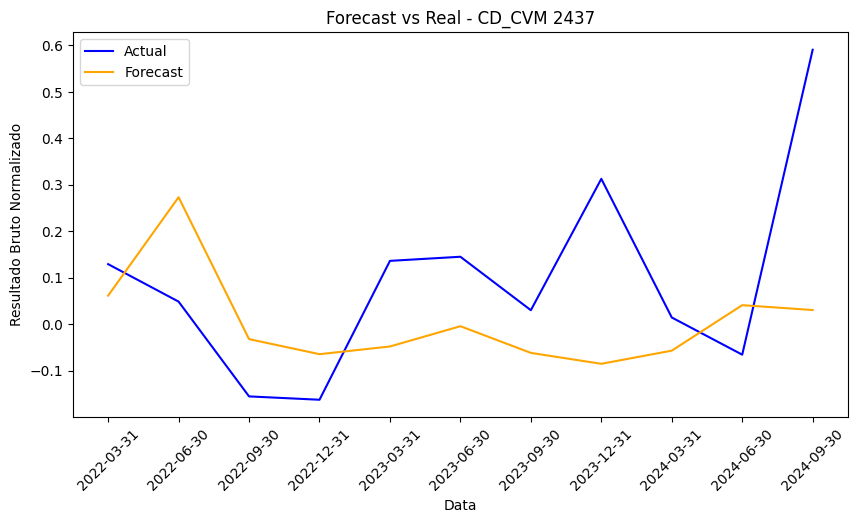

RMSE para CD_CVM 2437: 0.2398424333760152
40
11
11
Previsão para CD_CVM 18376 concluída.


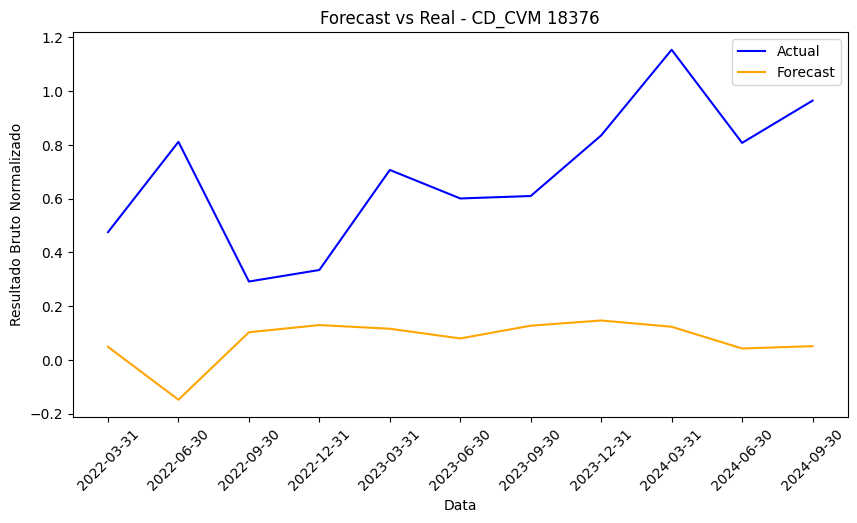

RMSE para CD_CVM 18376: 0.6732484518576027
40
11
11
Previsão para CD_CVM 20257 concluída.


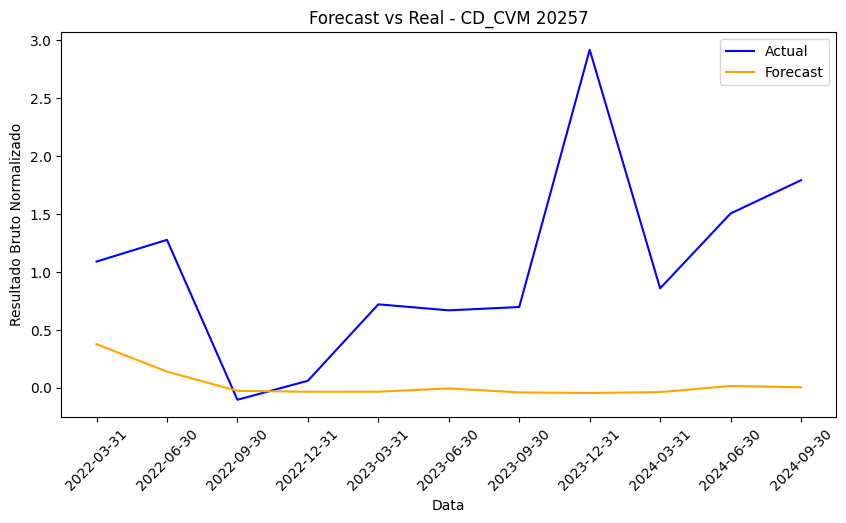

RMSE para CD_CVM 20257: 1.2925239723502397
40
11
11
Previsão para CD_CVM 21490 concluída.


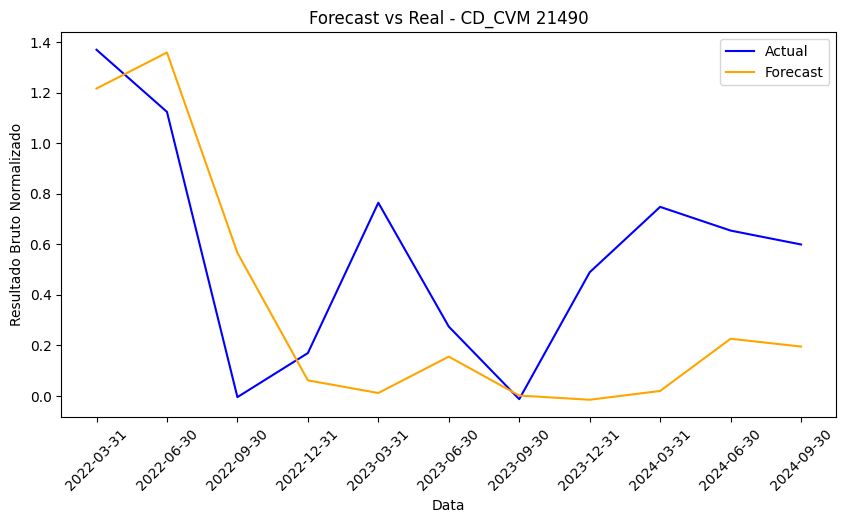

RMSE para CD_CVM 21490: 0.4398083961655971
[{'CD_CVM': 2437, 'RMSE': 0.2398424333760152, 'MAE': 0.18860942138822467}, {'CD_CVM': 18376, 'RMSE': 0.6732484518576027, 'MAE': 0.6153924882818037}, {'CD_CVM': 20257, 'RMSE': 1.2925239723502397, 'MAE': 1.0293542132681026}, {'CD_CVM': 21490, 'RMSE': 0.4398083961655971, 'MAE': 0.36518448024455413}]


In [ ]:
arimax_forecast_result = aplica_modelo_forecast(modelo_arimax_resultado_bruto, resultado_bruto_normalizado,input)

In [ ]:
df_combined_result_final['ARIMAX RMSE'] = arimax_forecast_result['RMSE']
df_combined_result_final['ARIMAX MAE'] = arimax_forecast_result['MAE']
df_combined_result_final['ARIMAX RMSE Improvement (%)'] = ((df_combined_result_final['Naive RMSE'] - df_combined_result_final['ARIMAX RMSE']) / df_combined_result_final['Naive RMSE']) * 100
df_combined_result_final.sort_values(by='ARIMAX RMSE Improvement (%)', ascending=False)

,AIC,BIC,RMSE,MAE,Naive RMSE,Naive MAE,RMSE Improvement (%),MAE Improvement (%),ARIMAX RMSE,ARIMAX MAE,ARIMAX RMSE Improvement (%)
CD_CVM,,,,,,,,,,,
21490,73.190805,85.991294,0.984763,0.939642,0.671926,0.563016,-46.558163,-66.894378,0.439808,0.365184,34.545162
2437,150.101701,155.587625,0.313564,0.225216,0.314044,0.285771,0.152867,21.189996,0.239842,0.188609,23.627845
20257,79.476775,90.448623,1.157143,1.035550,0.970092,0.838828,-19.281742,-23.452104,1.292524,1.029354,-33.237244
18376,144.307821,149.793745,0.751815,0.711995,0.247411,0.200523,-203.872181,-255.068597,0.673248,0.615392,-172.116940


In [ ]:
# Cria uma lista de dicionários com os valores de AIC e BIC para cada cd_cvm -> RESULTADO BRUTO
performance = []
for cd_cvm, modelo in result_bruto_arima.items():
    performance.append({
        'CD_CVM': cd_cvm,
        'AIC': modelo.aic,
        'BIC': modelo.bic
    })

# Cria o DataFrame e define CD_CVM como índice
df_performance_resul_bruto = pd.DataFrame(performance).set_index('CD_CVM')

# Ordena o DataFrame pelo AIC (menor é melhor)
df_performance_resul_bruto = df_performance_resul_bruto.sort_values(by='AIC')
df_combined_result = df_performance_resul_bruto.join(arimax_forecast_result)
print(df_combined_result.sort_values(by='CD_CVM'))

               AIC         BIC      RMSE       MAE
CD_CVM                                            
2437    150.101701  155.587625  0.239842  0.188609
18376   144.307821  149.793745  0.673248  0.615392
20257    79.476775   90.448623  1.292524  1.029354
21490    73.190805   85.991294  0.439808  0.365184
